In [17]:
import illustris_python as il
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import astropy.stats as astats
import time as time
t0 = time.time()
plt.rcParams['figure.facecolor'] = 'w'


basePath = '/Users/TaraD/TNG-300_1/output' #Folder with snapshots and group catalogs
snapshot_ind = 66

# Loading header file
header = il.groupcat.loadHeader(basePath, snapshot_ind)
#halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("Header File Keys: ")
print('\n'.join(list(header.keys())))

# Loading halo group quantities 
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
halo_keys = (list(halo_grp.keys()))
print("\nHalo Group File Keys: ")
print('\n'.join(halo_keys))

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
subhalo_keys = (list(subhalo_grp.keys()))
print("\nSubHalo Group File Keys: ")
print('\n'.join(subhalo_keys))
print(time.time()-t0)

Header File Keys: 
Ngroups_ThisFile
Nsubgroups_ThisFile
Nids_ThisFile
Ngroups_Total
Nsubgroups_Total
Nids_Total
NumFiles
Time
Redshift
HubbleParam
BoxSize
Omega0
OmegaLambda
FlagDoubleprecision
Git_commit
Git_date

Halo Group File Keys: 
count
GroupBHMass
GroupBHMdot
GroupCM
GroupFirstSub
GroupGasMetalFractions
GroupGasMetallicity
GroupLen
GroupLenType
GroupMass
GroupMassType
GroupNsubs
GroupPos
GroupSFR
GroupStarMetalFractions
GroupStarMetallicity
GroupVel
GroupWindMass
Group_M_Crit200
Group_M_Crit500
Group_M_Mean200
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit500
Group_R_Mean200
Group_R_TopHat200

SubHalo Group File Keys: 
count
SubhaloBHMass
SubhaloBHMdot
SubhaloCM
SubhaloFlag
SubhaloGasMetalFractions
SubhaloGasMetalFractionsHalfRad
SubhaloGasMetalFractionsMaxRad
SubhaloGasMetalFractionsSfr
SubhaloGasMetalFractionsSfrWeighted
SubhaloGasMetallicity
SubhaloGasMetallicityHalfRad
SubhaloGasMetallicityMaxRad
SubhaloGasMetallicitySfr
SubhaloGasMetallicitySfrWeighted
SubhaloGrNr
SubhaloH

In [24]:
import time as time
t0 = time.time()
from astropy.table import Table,join,Column
'''

useless_keys_subhalo = ['count','SubhaloBHMdot','SubhaloGasMetalFractionsHalfRad',
                'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad',
                'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted',
               'SubhaloGasMetallicityMaxRad','SubhaloGasMetallicitySfr','SubhaloGasMetallicitySfrWeighted', 
               'SubhaloIDMostbound', 'SubhaloSFRinHalfRad','SubhaloSFRinMaxRad', 'SubhaloSFRinRad',
               'SubhaloStarMetalFractionsHalfRad','SubhaloStarMetalFractionsMaxRad']
print(subhalo_keys)
for i in range(0, len(useless_keys_subhalo)):
    if useless_keys_subhalo[i] not in subhalo_keys:
        print(useless_keys_subhalo[i])
    else:
        subhalo_keys.remove(useless_keys_subhalo[i])
print(type(subhalo_grp))
print(subhalo_grp.keys())
[subhalo_grp.pop(key) for key in useless_keys_subhalo] 

 

subhalo_keys = (list(subhalo_grp.keys()))
halo_keys = (list(halo_grp.keys()))

subhalo_table = Table(list(subhalo_grp.values()), names=(subhalo_keys))

subhalo_table.add_column(Column([x for x in range(len(subhalo_table))]), name='Index' ,index=0)

subhalo_table.add_column(subhalo_table["SubhaloMassInHalfRadType"][:,4], name=str("StellarMassHalfRad"))
subhalo_table.add_column(subhalo_table["SubhaloMassType"][:,4], name=str("StellarMass"))

useless_keys_halo = ['count','GroupBHMdot','GroupGasMetalFractions', 'GroupStarMetalFractions']   
for i in range(0, len(useless_keys_halo)):
    halo_keys.remove(useless_keys_halo[i])

[halo_grp.pop(key) for key in useless_keys_halo]
halo_table = Table(list(halo_grp.values()), names=(halo_keys))

halo_table.add_column(Column([x for x in range(len(halo_table))]), name='SubhaloGrNr' ,index=0)

subhalo_table = join(subhalo_table, halo_table, keys='SubhaloGrNr', join_type='left')
'''
subhalo_table.add_column(Column(subhalo_table['GroupFirstSub'] == subhalo_table['Index']),name=str("IsCentral"))
print(len(subhalo_table))


'''
# Indexing the table
subhalo_table = Table({'Index': [x+1 for x in range(subhalo_grp['count'])]})
# Tabulating the subhalo info
for i in range(1,len(subhalo_keys)):
    subhalo_table.add_column(Column(subhalo_grp[str(subhalo_keys[i])]), name = str(subhalo_keys[i]))
# Tabulating the halo info

for i in range(1, len(halo_keys)):
    subhalo_data = [0]*len(subhalo_table)
    for j in range(0, len(subhalo_table)):
        subhalo_data[j] = halo_grp[str(halo_keys[i])][subhalo_table['SubhaloGrNr'][j]]
    subhalo_table.add_column(Column(subhalo_data), name=str(halo_keys[i]))
'''
print(time.time()-t0)
print('\n'.join(subhalo_table.colnames))


15904796
2.3658030033111572
Index
SubhaloBHMass
SubhaloCM
SubhaloFlag
SubhaloGasMetalFractions
SubhaloGrNr
SubhaloHalfmassRad
SubhaloHalfmassRadType
SubhaloLen
SubhaloLenType
SubhaloMass
SubhaloMassInHalfRad
SubhaloMassInHalfRadType
SubhaloMassInMaxRad
SubhaloMassInMaxRadType
SubhaloMassInRad
SubhaloMassInRadType
SubhaloMassType
SubhaloParent
SubhaloPos
SubhaloSFR
SubhaloSpin
SubhaloStarMetalFractions
SubhaloStarMetallicity
SubhaloStarMetallicityHalfRad
SubhaloStarMetallicityMaxRad
SubhaloStellarPhotometrics
SubhaloStellarPhotometricsMassInRad
SubhaloStellarPhotometricsRad
SubhaloVel
SubhaloVelDisp
SubhaloVmax
SubhaloVmaxRad
SubhaloWindMass
StellarMassHalfRad
StellarMass
GroupBHMass
GroupCM
GroupFirstSub
GroupGasMetallicity
GroupLen
GroupLenType
GroupMass
GroupMassType
GroupNsubs
GroupPos
GroupSFR
GroupStarMetallicity
GroupVel
GroupWindMass
Group_M_Crit200
Group_M_Crit500
Group_M_Mean200
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit500
Group_R_Mean200
Group_R_TopHat200
IsCentral


In [31]:
#import astropy
#print(astropy.__version__)
print(len(subhalo_table))

15904796


In [32]:
print(len(subhalo_table))
print(subhalo_table.colnames)
print(subhalo_table[:10])

#is_central = np.array([0]*len(subhalo_table),dtype=bool)
#temp = halo_grp['GroupFirstSub']>-1
#groupfirstsub = np.array(halo_grp['GroupFirstSub'])
#is_central[groupfirstsub[temp]]=True
#subhalo_table.add_column(Column(is_central),name=str("IsCentral"))
#subhalo_table.add_column(subhalo_table["SubhaloMassInHalfRadType"][:,4], name=str("StellarMassHalfRad"))
#subhalo_table.add_column(subhalo_table["SubhaloMassType"][:,4], name=str("StellarMass"))
'''
is_field = np.array([0]*len(subhalo_table),dtype=bool)
temp2 = subhalo_table['GroupNsubs']==1
is_field = (subhalo_table['GroupNsubs'])[temp2]
subhalo_table.add_column(Column(is_field),name=str("IsField"))
is_satellite = np.array([0]*len(subhalo_table),dtype=bool)
temp3 = subhalo_table['IsCentral']==False
is_satellite = (subhalo_table['IsCentral'])[temp3]
subhalo_table.add_column(is_satellite,name=str("IsSatellite"))
'''
#print(len(subhalo_table))
#print(subhalo_table.colnames)
#print(subhalo_table[:10])

15904796
['Index', 'SubhaloBHMass', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', 'SubhaloStarMetallicityMaxRad', 'SubhaloStellarPhotometrics', 'SubhaloStellarPhotometricsMassInRad', 'SubhaloStellarPhotometricsRad', 'SubhaloVel', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloVmaxRad', 'SubhaloWindMass', 'StellarMassHalfRad', 'StellarMass', 'GroupBHMass', 'GroupCM', 'GroupFirstSub', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit20

'\nis_field = np.array([0]*len(subhalo_table),dtype=bool)\ntemp2 = subhalo_table[\'GroupNsubs\']==1\nis_field = (subhalo_table[\'GroupNsubs\'])[temp2]\nsubhalo_table.add_column(Column(is_field),name=str("IsField"))\nis_satellite = np.array([0]*len(subhalo_table),dtype=bool)\ntemp3 = subhalo_table[\'IsCentral\']==False\nis_satellite = (subhalo_table[\'IsCentral\'])[temp3]\nsubhalo_table.add_column(is_satellite,name=str("IsSatellite"))\n'

In [33]:
def basic_sub_cuts(subhalos, field):
    
    #subhalos = subhalos[field][subhalos['SubhaloFlag']]
    #subhalos = subhalos[subhalos['SubhaloMass']!=0]
    #subhalos = subhalos[subhalos['SubhaloMassType'][:,4]!=0]
    mask1 = subhalos['SubhaloStellarPhotometrics']<8e+36
    photo_mask = mask1[:,0]
    for i in range (1,8):
        photo_mask = photo_mask & mask1[:,i]
    #subhalos = subhalos[photo_mask]
    mask = (subhalos['SubhaloFlag'])&(subhalos['SubhaloMass']!=0)&(subhalos['SubhaloMassType'][:,4]!=0)&(photo_mask)
    return subhalos[field][mask]
#print(len(subhalo_grp[]))
def Bootstrap_Covariance(NDensity_list, Nb, R):
    halo_array2 = np.arange(0,len(NDensity_list))
    halo_boot = astats.bootstrap(halo_array2, bootnum=300, samples=None)
    resampled_list = []
    for b in range(0,300):
        mask_b = (np.array(halo_boot[b].astype(int)))
        resampled_profile = np.mean((np.array(NDensity_list))[mask_b], axis=0)
        resampled_list.append(resampled_profile)
    resampled_array = np.array(resampled_list)
    Yi = resampled_array
    Yi_avg = np.mean(Yi, axis=0)
    Yi_avg_array = np.tile(Yi_avg, (Nb,1))
    minus_array = Yi - Yi_avg_array
    Yi_cov = np.zeros((R,R))
    for i in range(R):
        for j in range(R):
            Yi_cov[i,j] = (1./(Nb-1.))*(np.sum(minus_array[:,i]*minus_array[:,j]))
    boot_err = np.sqrt(np.diag(Yi_cov))
    return Yi_avg, Yi_cov, boot_err

#SAVITSKY GOLAY LOG DERIVATIVE:
#Functions to get log slope
import scipy.signal as signal
import scipy.interpolate as interpolate
#w = 9
#p = 5
def get_slope_sg(xx, yy, num_output,w,p):
    # Savitsky-Golay smoothing                                                                                                                                        
    window_size = w#7#9
    poly_order = p#5#5
    yy_filtered = signal.savgol_filter(np.log(yy), window_size, poly_order)
    # fit spline                                                                                                                                                      
    yy_spline = interpolate.interp1d(np.log(xx), yy_filtered, kind = 'cubic')
    #Evaluate spline on very fine grid                                                                                                                                
    numsmooth = 1000
    lnxx_fine = np.linspace(np.log(np.min(xx)), np.log(np.max(xx)), num = numsmooth)
    lnyy_fine = yy_spline(lnxx_fine)
    yy_fine = np.exp(lnyy_fine)
    #Calculate derivative using finite differences                                                                                                                    
    dlny_dlnx_fine = (lnyy_fine[1:] - lnyy_fine[:-1])/(lnxx_fine[1:] - lnxx_fine[:-1])
    #Interpolate derivative onto desired array                                                                                                                        
    interp_func = interpolate.interp1d(lnxx_fine[:-1], dlny_dlnx_fine)
    lnxx_out = np.linspace(np.min(lnxx_fine[:-1]), np.max(lnxx_fine[:-1]), num = num_output)
    dlny_dlnx_out = interp_func(lnxx_out)
    return np.exp(lnxx_out), dlny_dlnx_out, yy_fine, np.exp(lnxx_fine)

def DensityProfileColors(Rmin,Rmax,bins,r_subhalo,blue_mask_subs,red_mask_subs,green_mask_subs):    
    # MAKING PROFILE
    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_blue = []
    NDensity_red = []
    NDensity_green = []
    galaxies = []
    galaxies_blue = []
    galaxies_red = []
    galaxies_green = []
    
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_blue = len(r_subhalo[mask_sep & blue_mask_subs])
        number_red = len(r_subhalo[mask_sep & red_mask_subs])
        number_green = len(r_subhalo[mask_sep & green_mask_subs])

        NDensity_blue.append(number_blue/volume)
        NDensity_red.append(number_red/volume)
        NDensity_green.append(number_green/volume)        
        galaxies_blue.append(number_blue)
        galaxies_red.append(number_red)
        galaxies_green.append(number_green)
    return NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green


In [ ]:
# PROFILE FITTING FUNCTIONS
r_0 = 1.5 # Fix r_0 to 1.5 Mpc/h

# Define halo profile model
def rho_DK14(theta, r):
    """
    Definition of halo profile model from Diemer Kravstov 2014
    r_s, r_t, r must all be in units of kpc/h
    """
    
    lg_alpha, lg_beta, lg_gamma, lg_r_s, lg_r_t, lg_rho_s, lg_rho_0, s_e = theta
    alpha = 10.**lg_alpha
    beta = 10.**lg_beta
    gamma = 10.**lg_gamma
    r_s = 10.**lg_r_s
    r_t = 10.**lg_r_t
    rho_s = 10**lg_rho_s
    rho_0 = 10**lg_rho_0
    
   
    def rho_inner(r):
        exp_arg = -2/alpha*((r/r_s)**alpha-1)
        return rho_s*np.exp(exp_arg)

    def rho_outer(r):
        return rho_0*(r/r_0)**(-s_e)

    def f_trans(r):
        return (1+(r/r_t)**beta)**(-gamma/beta)
    
    return rho_inner(r)*f_trans(r)+rho_outer(r)

    
def ln_like3d(theta,  r_data, rho_data, cov):
    """
    Definition of log-likelihood using DK14 moel
    """
    
    rho_thr = rho_DK14(theta, r_data)
    diff = rho_data-rho_thr
    
    likelihood = -1/2 * np.dot(diff, np.linalg.solve(cov, diff))
    
    if (np.isnan(likelihood)==True):
        return -np.inf

    return likelihood


def ln_prior(theta):
    """
    Definition of parameter priors
    """

    lg_alpha, lg_beta, lg_gamma, lg_r_s, lg_r_t, lg_rho_s, lg_rho_0, s_e = theta
    alpha = 10.**lg_alpha
    beta = 10.**lg_beta
    gamma = 10.**lg_gamma
    r_s = 10.**lg_r_s
    r_t = 10.**lg_r_t
    rho_s = 10**lg_rho_s
    rho_0 = 10**lg_rho_0
    
    
    # Top hat prior on r_s, r_t, s_e
    r_s_check = (r_s > 0.1) & (r_s < 5)
    r_t_check = (r_t > 0.1) & (r_t < 5)
    s_e_check = (s_e > 1.0) & (s_e < 10)

    rho_s_check = True
    rho_0_check = True

    flat_prior_check = r_s_check & r_t_check & s_e_check & rho_s_check & rho_0_check 
    
    if not flat_prior_check:
        return -np.inf

    return  -0.5*(lg_alpha - np.log10(0.19))**2/0.2**2 - 0.5*(lg_beta - np.log10(4.0))**2/0.2**2 - 0.5*(lg_gamma - np.log10(6.0))**2/0.2**2
    

def ln_prob3d(theta, r, rho, cov):
    """
    Total probability definition (likelihood+prior)
    """
    lp = ln_prior(theta)
    
    if not np.isfinite(lp):
        return -np.inf

    return lp+ln_like3d(theta, r, rho, cov)


def main(p0,nwalkers,niter,ndim,ln_prob, data):
    sampler = emcee.EnsembleSampler(n_walkers, n_dim, ln_prob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, n_burn, progress=True)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, n_iter, progress=True)

    return sampler, pos, prob, state


# New Table + All subhalo Color Split Profiles

## Halo array, table masking, initializing lists

In [54]:
t0 = time.time()
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))#&(halo_grp['GroupNsubs']>=5) #1e10 Msun/h
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 5*10^13 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

subhalo_table_clean = subhalo_table[(subhalo_table['SubhaloFlag'])&(subhalo_table['SubhaloMass']!=0)&(subhalo_table['SubhaloMassType'][:,4]!=0)]
# MAKING TABLE AFTER MASS CUT
M = 9
subhalo_table_m = subhalo_table_clean[np.array(np.log10(subhalo_table_clean['StellarMass']*(1e10)))>M]
CM_coords = subhalo_table_m['SubhaloPos'] #length of subhalo_table_m. so all subhalos greater than cutoff mass

NDensity_list = []
NDensity_list_b = []
NDensity_list_r = []
NDensity_list_g = []
ND_boot = []
ND_boot_b = []
ND_boot_r = []
ND_boot_g = []
RScale_list = []
Rmax_list = []
print(time.time()-t0)


Number of halos with mass > 5*10^13 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 

## New Color Split Profiles (remove plots to run faster, change to pos)

starting halo loop

Halo: 0
Halo Mass: 87453.625
N Subhalos from Illustris Algorithm: 5464 0.10657286643981934
R500c, R200c, R200m: 0.7612624597816122 1.24644093717065 1.5473688588641492
232118 232118 time 0.7765238285064697
N Subhalos within 5*R200m: 1175 4.3692498207092285
galaxies [4, 8, 14, 20, 16, 27, 32, 21, 25, 59, 52, 35, 29, 32, 19, 39, 70, 122, 290, 243]
blue galaxies counted [0, 0, 0, 2, 1, 4, 3, 5, 3, 6, 6, 9, 4, 18, 15, 32, 40, 67, 96, 155]
red galaxies counted [2, 1, 7, 3, 4, 6, 8, 4, 6, 15, 11, 8, 8, 5, 2, 4, 11, 18, 64, 34]
red galaxies counted [2, 7, 7, 15, 11, 17, 21, 12, 16, 38, 35, 18, 17, 9, 2, 3, 19, 37, 130, 54]
sum of galaxies: 1157

Halo: 1
Halo Mass: 57760.027
N Subhalos from Illustris Algorithm: 3959 4.55696702003479
R500c, R200c, R200m: 0.5860514830407864 0.916949635434108 1.1697442162737657
232118 232118 time 4.634944915771484
N Subhalos within 5*R200m: 550 5.652943849563599
galaxies [5, 7, 10, 7, 5, 13, 12, 15, 11, 15, 14, 34, 46, 41, 19, 26, 28, 79, 67, 8

N Subhalos within 5*R200m: 280 16.536995887756348
galaxies [1, 3, 2, 4, 5, 6, 14, 6, 12, 9, 11, 7, 9, 22, 19, 14, 21, 30, 28, 48]
blue galaxies counted [0, 1, 0, 0, 3, 2, 3, 3, 7, 5, 6, 3, 4, 5, 9, 10, 19, 25, 23, 43]
red galaxies counted [1, 1, 0, 3, 1, 2, 3, 1, 3, 1, 2, 0, 1, 7, 2, 2, 1, 5, 4, 4]
red galaxies counted [0, 1, 2, 1, 1, 2, 8, 2, 2, 3, 3, 4, 4, 10, 8, 2, 1, 0, 1, 1]
sum of galaxies: 271

Halo: 14
Halo Mass: 25908.443
N Subhalos from Illustris Algorithm: 1733 16.555925846099854
R500c, R200c, R200m: 0.5403272153001663 0.8218303411036568 1.0292258540514474
232118 232118 time 16.584889888763428
N Subhalos within 5*R200m: 383 16.865248918533325
galaxies [2, 4, 3, 2, 8, 7, 10, 10, 15, 7, 14, 15, 20, 6, 3, 6, 12, 58, 112, 61]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 8, 1, 1, 4, 8, 27, 33, 48]
red galaxies counted [1, 3, 1, 0, 2, 5, 0, 2, 2, 1, 4, 3, 2, 0, 0, 1, 3, 10, 28, 6]
red galaxies counted [1, 1, 2, 2, 6, 0, 10, 7, 11, 5, 9, 10, 10, 5, 2, 1, 1, 21, 51, 7]

232118 232118 time 19.833161115646362
N Subhalos within 5*R200m: 158 19.921333074569702
galaxies [1, 3, 1, 2, 4, 2, 6, 8, 6, 18, 16, 9, 9, 2, 6, 7, 7, 15, 13, 18]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 1, 2, 5, 2, 4, 0, 4, 7, 7, 10, 13, 17]
red galaxies counted [1, 2, 0, 0, 2, 1, 2, 0, 2, 4, 4, 1, 0, 1, 2, 0, 0, 4, 0, 0]
red galaxies counted [0, 1, 1, 2, 2, 0, 3, 5, 3, 12, 7, 6, 5, 1, 0, 0, 0, 1, 0, 1]
sum of galaxies: 153

Halo: 29
Halo Mass: 18336.77
N Subhalos from Illustris Algorithm: 1211 19.929563999176025
R500c, R200c, R200m: 0.37254839425574054 0.582633141407676 0.7267309038611021
232118 232118 time 19.954638957977295
N Subhalos within 5*R200m: 212 20.13281011581421
galaxies [0, 2, 2, 3, 0, 3, 2, 2, 7, 4, 6, 4, 3, 9, 17, 32, 15, 17, 24, 56]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 5, 6, 8, 7, 14, 17, 26]
red galaxies counted [0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 3, 9, 2, 1, 5, 14]
red galaxies counted [0, 1, 0, 2, 0, 2, 2, 1, 4, 3, 5, 3, 1, 4, 

232118 232118 time 22.497562885284424
N Subhalos within 5*R200m: 126 22.592766046524048
galaxies [1, 1, 2, 1, 2, 7, 2, 5, 6, 4, 6, 8, 6, 7, 3, 6, 6, 18, 6, 19]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 2, 2, 1, 3, 3, 4, 6, 17, 4, 13]
red galaxies counted [0, 0, 1, 0, 1, 4, 0, 0, 2, 0, 1, 3, 3, 1, 0, 2, 0, 1, 2, 2]
red galaxies counted [1, 1, 1, 1, 1, 3, 2, 4, 1, 3, 3, 3, 2, 3, 0, 0, 0, 0, 0, 4]
sum of galaxies: 116

Halo: 45
Halo Mass: 14590.398
N Subhalos from Illustris Algorithm: 1159 22.64050793647766
R500c, R200c, R200m: 0.4273328987279976 0.6585129593236665 0.8233019274683564
232118 232118 time 22.671004056930542
N Subhalos within 5*R200m: 149 22.778947830200195
galaxies [2, 2, 4, 5, 4, 5, 3, 6, 7, 4, 8, 4, 10, 10, 8, 3, 2, 18, 10, 31]
blue galaxies counted [0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 3, 1, 4, 7, 3, 3, 2, 11, 9, 26]
red galaxies counted [1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 3, 2, 0, 0, 6, 0, 3]
red galaxies counted [1, 1, 3, 5, 3, 3, 2, 4, 3, 2, 4, 2, 4, 0, 3, 0, 0

232118 232118 time 24.896812915802002
N Subhalos within 5*R200m: 113 24.983577013015747
galaxies [2, 1, 2, 3, 3, 0, 2, 1, 6, 5, 2, 1, 4, 12, 8, 8, 6, 11, 10, 23]
blue galaxies counted [0, 0, 0, 2, 0, 0, 1, 1, 4, 1, 1, 1, 2, 9, 4, 6, 6, 11, 8, 21]
red galaxies counted [1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2]
red galaxies counted [1, 1, 0, 1, 3, 0, 1, 0, 1, 2, 0, 0, 1, 2, 3, 2, 0, 0, 1, 0]
sum of galaxies: 110

Halo: 60
Halo Mass: 13212.502
N Subhalos from Illustris Algorithm: 1004 24.989710807800293
R500c, R200c, R200m: 0.3776427781968694 0.5875990547942501 0.7484706518690818
232118 232118 time 25.011208057403564
N Subhalos within 5*R200m: 188 25.09944200515747
galaxies [0, 1, 3, 1, 5, 5, 3, 5, 6, 9, 7, 8, 8, 5, 8, 8, 15, 9, 26, 48]
blue galaxies counted [0, 0, 1, 0, 1, 0, 0, 0, 1, 4, 4, 1, 2, 3, 6, 7, 13, 8, 14, 31]
red galaxies counted [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 0, 1, 1, 6, 8]
red galaxies counted [0, 0, 1, 0, 3, 4, 2, 4, 4, 5, 3, 4, 5, 1, 1, 1, 

N Subhalos within 5*R200m: 126 26.852422952651978
galaxies [0, 3, 2, 2, 3, 2, 5, 4, 4, 3, 12, 3, 3, 4, 4, 4, 9, 7, 19, 30]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 5, 2, 1, 3, 4, 1, 9, 7, 16, 25]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 4, 0, 1, 0, 0, 2, 0, 0, 3, 4]
red galaxies counted [0, 3, 1, 2, 3, 1, 4, 2, 3, 1, 3, 1, 1, 1, 0, 1, 0, 0, 0, 1]
sum of galaxies: 123

Halo: 75
Halo Mass: 11098.97
N Subhalos from Illustris Algorithm: 766 26.867711067199707
R500c, R200c, R200m: 0.38077923725764584 0.5870507829822756 0.7396862925420682
232118 232118 time 26.893802165985107
N Subhalos within 5*R200m: 205 26.966706037521362
galaxies [3, 3, 0, 5, 3, 5, 4, 3, 3, 8, 4, 5, 8, 5, 3, 5, 18, 18, 44, 56]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 1, 4, 2, 1, 1, 4, 3, 4, 8, 9, 29, 36]
red galaxies counted [1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 3, 0, 0, 1, 5, 4, 7, 9]
red galaxies counted [2, 2, 0, 4, 3, 3, 2, 1, 2, 3, 1, 3, 4, 1, 0, 0, 5, 5, 8, 11]
sum of galaxies: 203

Halo

N Subhalos within 5*R200m: 141 28.432868003845215
galaxies [1, 0, 1, 0, 0, 4, 1, 2, 3, 4, 3, 6, 9, 5, 4, 9, 10, 12, 30, 35]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 4, 3, 4, 6, 7, 10, 18, 31]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 3, 1, 4, 3]
red galaxies counted [1, 0, 1, 0, 0, 4, 0, 2, 3, 1, 3, 3, 5, 1, 0, 1, 0, 1, 8, 1]
sum of galaxies: 139

Halo: 90
Halo Mass: 10491.106
N Subhalos from Illustris Algorithm: 780 28.44162106513977
R500c, R200c, R200m: 0.37936257816027225 0.584745599270447 0.7141823452753009
232118 232118 time 28.46663784980774
N Subhalos within 5*R200m: 163 28.53090000152588
galaxies [0, 0, 2, 2, 2, 4, 6, 5, 2, 4, 6, 5, 8, 7, 10, 7, 11, 2, 26, 48]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 3, 2, 1, 4, 8, 6, 10, 1, 13, 36]
red galaxies counted [0, 0, 2, 1, 0, 1, 2, 1, 0, 3, 1, 0, 1, 2, 1, 0, 1, 0, 4, 5]
red galaxies counted [0, 0, 0, 1, 2, 2, 2, 3, 2, 0, 2, 3, 6, 1, 1, 1, 0, 1, 9, 7]
sum of galaxies: 157

Halo:

232118 232118 time 29.629495859146118
N Subhalos within 5*R200m: 167 29.671756982803345
galaxies [2, 2, 3, 1, 2, 4, 3, 6, 3, 5, 6, 4, 2, 6, 3, 8, 19, 32, 20, 32]
blue galaxies counted [0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 4, 1, 5, 3, 7, 13, 15, 16, 26]
red galaxies counted [1, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 4, 7, 2, 4]
red galaxies counted [1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 4, 0, 0, 1, 0, 0, 2, 10, 2, 2]
sum of galaxies: 163

Halo: 105
Halo Mass: 9441.806
N Subhalos from Illustris Algorithm: 794 29.676187992095947
R500c, R200c, R200m: 0.3609313572852022 0.5742569733471751 0.7234636922820409
232118 232118 time 29.696372032165527
N Subhalos within 5*R200m: 195 29.75160789489746
galaxies [1, 1, 1, 1, 3, 3, 2, 3, 6, 12, 6, 6, 5, 4, 4, 6, 22, 21, 37, 48]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 2, 1, 1, 4, 6, 17, 8, 21, 33]
red galaxies counted [1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 8, 4]
red galaxies counted [0, 0, 1, 1, 2, 3, 0, 3, 2, 7, 3, 3, 4, 2, 0,

232118 232118 time 31.027018070220947
N Subhalos within 5*R200m: 133 31.107814073562622
galaxies [1, 4, 0, 2, 1, 4, 8, 3, 4, 8, 1, 5, 4, 1, 0, 4, 12, 11, 20, 37]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 4, 10, 10, 14, 28]
red galaxies counted [0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 0, 2, 1, 3, 6]
red galaxies counted [1, 3, 0, 2, 1, 4, 5, 0, 3, 4, 1, 5, 4, 1, 0, 0, 0, 0, 3, 3]
sum of galaxies: 130

Halo: 121
Halo Mass: 9259.929
N Subhalos from Illustris Algorithm: 824 31.11417293548584
R500c, R200c, R200m: 0.3034331375417668 0.4711724645998827 0.601254726099171
232118 232118 time 31.143122911453247
N Subhalos within 5*R200m: 71 31.2442409992218
galaxies [1, 0, 1, 0, 1, 1, 1, 4, 3, 1, 0, 5, 10, 7, 1, 1, 6, 9, 11, 6]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 3, 3, 1, 1, 3, 6, 10, 6]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 3, 2, 1, 0]
red galaxies counted [0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 6, 2, 0, 0, 0, 1, 

232118 232118 time 32.55104899406433
N Subhalos within 5*R200m: 139 32.5928909778595
galaxies [1, 4, 2, 1, 3, 3, 3, 2, 5, 6, 10, 6, 2, 6, 3, 3, 6, 18, 34, 13]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 0, 0, 3, 1, 3, 6, 12, 10, 10]
red galaxies counted [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 3, 8, 2]
red galaxies counted [0, 3, 1, 1, 3, 2, 2, 1, 3, 3, 6, 6, 0, 1, 2, 0, 0, 3, 16, 1]
sum of galaxies: 131

Halo: 137
Halo Mass: 8702.109
N Subhalos from Illustris Algorithm: 666 32.59868288040161
R500c, R200c, R200m: 0.40050092863926473 0.5958553597072482 0.7231846521557567
232118 232118 time 32.62905287742615
N Subhalos within 5*R200m: 74 32.658689975738525
galaxies [0, 0, 1, 2, 5, 6, 1, 6, 5, 5, 2, 0, 4, 0, 2, 2, 6, 7, 3, 15]
blue galaxies counted [0, 0, 0, 1, 0, 1, 1, 3, 2, 3, 0, 0, 3, 0, 2, 2, 6, 4, 2, 14]
red galaxies counted [0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1]
red galaxies counted [0, 0, 0, 1, 5, 2, 0, 3, 3, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1

N Subhalos within 5*R200m: 63 34.44041609764099
galaxies [0, 0, 0, 0, 3, 3, 0, 1, 1, 5, 2, 4, 2, 11, 2, 5, 4, 2, 5, 10]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 4, 2, 4, 7]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 1, 3]
red galaxies counted [0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 7, 1, 3, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 152
Halo Mass: 8128.882
N Subhalos from Illustris Algorithm: 566 34.462804079055786
R500c, R200c, R200m: 0.3697602349221769 0.5736313149406371 0.7048703318787857
232118 232118 time 34.577991008758545
N Subhalos within 5*R200m: 97 34.667616844177246
galaxies [1, 0, 0, 3, 3, 2, 5, 6, 6, 7, 4, 2, 2, 4, 1, 5, 7, 8, 18, 10]
blue galaxies counted [0, 0, 0, 1, 1, 0, 3, 2, 3, 3, 2, 0, 1, 2, 0, 4, 7, 4, 9, 6]
red galaxies counted [1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 2, 3, 2, 1, 2, 1, 2, 0, 0, 0, 2, 8, 4]
sum of galaxies: 94

Halo: 153
Halo Ma

232118 232118 time 36.35876107215881
N Subhalos within 5*R200m: 102 36.410661935806274
galaxies [2, 0, 0, 4, 1, 0, 1, 1, 0, 4, 7, 5, 5, 3, 8, 14, 9, 7, 11, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 3, 1, 2, 4, 10, 6, 6, 11, 13]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2]
red galaxies counted [1, 0, 0, 4, 1, 0, 1, 0, 0, 2, 3, 1, 4, 0, 4, 2, 2, 0, 0, 0]
sum of galaxies: 97

Halo: 166
Halo Mass: 7621.157
N Subhalos from Illustris Algorithm: 633 36.41629099845886
R500c, R200c, R200m: 0.34932849251046083 0.5405197009425156 0.6716175163705631
232118 232118 time 36.47699213027954
N Subhalos within 5*R200m: 125 36.51570105552673
galaxies [2, 2, 0, 2, 0, 6, 3, 7, 5, 7, 8, 4, 4, 5, 4, 5, 5, 7, 31, 17]
blue galaxies counted [0, 0, 0, 0, 0, 2, 1, 2, 0, 3, 4, 4, 2, 5, 4, 5, 5, 7, 27, 11]
red galaxies counted [1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3]
red galaxies counted [1, 2, 0, 2, 0, 3, 2, 5, 3, 2, 3, 0, 2, 0, 0, 0, 0, 0, 

N Subhalos within 5*R200m: 100 37.77050495147705
galaxies [0, 1, 0, 3, 2, 3, 7, 8, 9, 6, 1, 2, 2, 1, 5, 3, 7, 4, 17, 17]
blue galaxies counted [0, 0, 0, 3, 1, 0, 6, 4, 7, 5, 1, 2, 1, 1, 3, 3, 6, 3, 12, 11]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 3, 1]
red galaxies counted [0, 1, 0, 0, 0, 2, 1, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 5]
sum of galaxies: 98

Halo: 180
Halo Mass: 7179.918
N Subhalos from Illustris Algorithm: 588 37.777381896972656
R500c, R200c, R200m: 0.3469176178469262 0.5528558367291683 0.6783286916316329
232118 232118 time 37.82799506187439
N Subhalos within 5*R200m: 85 37.90122389793396
galaxies [0, 0, 0, 3, 0, 2, 2, 5, 7, 6, 4, 5, 3, 1, 1, 3, 7, 11, 8, 11]
blue galaxies counted [0, 0, 0, 1, 0, 2, 0, 0, 2, 3, 2, 4, 3, 1, 1, 1, 6, 10, 8, 11]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0]
red galaxies counted [0, 0, 0, 2, 0, 0, 2, 4, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 79

Halo: 181
Halo

N Subhalos within 5*R200m: 126 39.081323862075806
galaxies [0, 0, 0, 2, 2, 1, 2, 2, 7, 6, 6, 2, 4, 0, 5, 10, 5, 16, 17, 36]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 5, 0, 3, 0, 4, 7, 5, 15, 15, 30]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 0, 3, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 4]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 0, 3, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2]
sum of galaxies: 123

Halo: 196
Halo Mass: 6886.1846
N Subhalos from Illustris Algorithm: 545 39.088839054107666
R500c, R200c, R200m: 0.34478286079472337 0.5249554272013718 0.6443699486418077
232118 232118 time 39.14302182197571
N Subhalos within 5*R200m: 98 39.17993402481079
galaxies [0, 0, 1, 1, 2, 1, 4, 4, 5, 5, 3, 5, 5, 7, 2, 3, 6, 6, 23, 13]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 2, 3, 2, 3, 6, 6, 18, 10]
red galaxies counted [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 4, 3]
red galaxies counted [0, 0, 1, 0, 2, 0, 3, 4, 2, 5, 1, 4, 3, 2, 0, 0, 0, 0, 1, 0]
sum of galaxies: 96

Halo: 1

N Subhalos within 5*R200m: 50 40.174219846725464
galaxies [1, 1, 2, 3, 2, 2, 4, 5, 2, 1, 4, 4, 3, 2, 0, 0, 1, 2, 3, 4]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 3, 3, 3, 2, 0, 0, 1, 2, 3, 4]
red galaxies counted [0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 46

Halo: 210
Halo Mass: 6658.897
N Subhalos from Illustris Algorithm: 599 40.19323396682739
R500c, R200c, R200m: 0.28703044230209973 0.45941891015005754 0.5882327601255203
232118 232118 time 40.234370946884155
N Subhalos within 5*R200m: 106 40.30366897583008
galaxies [1, 1, 3, 0, 0, 3, 2, 4, 2, 3, 0, 7, 5, 2, 1, 3, 4, 18, 21, 23]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 5, 3, 2, 0, 3, 3, 15, 17, 11]
red galaxies counted [1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 5]
red galaxies counted [0, 1, 3, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 3, 7]
sum of galaxies: 103

Halo: 211
Ha

N Subhalos within 5*R200m: 102 42.549643754959106
galaxies [0, 1, 1, 1, 0, 3, 0, 0, 6, 2, 7, 2, 3, 3, 2, 12, 13, 12, 9, 23]
blue galaxies counted [0, 0, 0, 0, 0, 3, 0, 0, 5, 1, 2, 2, 3, 2, 1, 10, 7, 7, 7, 18]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 5]
red galaxies counted [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 1, 0, 4, 4, 1, 0]
sum of galaxies: 100

Halo: 224
Halo Mass: 6104.093
N Subhalos from Illustris Algorithm: 499 42.56143283843994
R500c, R200c, R200m: 0.31905039687934345 0.4913570343086319 0.624103228238778
232118 232118 time 42.61115884780884
N Subhalos within 5*R200m: 98 42.67925214767456
galaxies [0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 6, 2, 3, 6, 4, 1, 6, 18, 14, 22]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 2, 1, 3, 4, 1, 5, 11, 14, 21]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 6, 0, 1]
red galaxies counted [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 3, 0, 0, 0, 1, 0, 0]
sum of galaxies: 94

Halo: 225

232118 232118 time 44.0008819103241
N Subhalos within 5*R200m: 84 44.056811809539795
galaxies [0, 1, 2, 1, 3, 1, 1, 4, 0, 4, 3, 5, 4, 5, 1, 0, 3, 9, 14, 21]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 3, 1, 1, 0, 3, 9, 12, 18]
red galaxies counted [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 0, 1, 2]
red galaxies counted [0, 0, 2, 1, 3, 0, 0, 3, 0, 3, 0, 3, 1, 1, 0, 0, 0, 0, 1, 1]
sum of galaxies: 82

Halo: 238
Halo Mass: 6075.759
N Subhalos from Illustris Algorithm: 483 44.06113386154175
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
232118 232118 time 44.08198404312134
N Subhalos within 5*R200m: 52 44.11627984046936
galaxies [0, 0, 3, 2, 2, 0, 2, 0, 3, 8, 1, 2, 3, 2, 1, 3, 3, 2, 8, 5]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 2, 5, 0, 0, 3, 1, 1, 2, 3, 1, 6, 4]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1]
red galaxies counted [0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
sum 

N Subhalos within 5*R200m: 103 45.5793240070343
galaxies [1, 0, 0, 3, 0, 2, 2, 4, 4, 8, 4, 2, 1, 1, 5, 7, 16, 6, 6, 28]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 3, 5, 12, 6, 6, 16]
red galaxies counted [0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 3, 0, 0, 7]
red galaxies counted [1, 0, 0, 0, 0, 2, 2, 4, 1, 5, 3, 0, 1, 0, 1, 1, 1, 0, 0, 5]
sum of galaxies: 100

Halo: 254
Halo Mass: 5788.7324
N Subhalos from Illustris Algorithm: 548 45.602627992630005
R500c, R200c, R200m: 0.2366688839692533 0.3846282695189578 0.48656106716826675
232118 232118 time 45.62646985054016
N Subhalos within 5*R200m: 66 45.64790892601013
galaxies [0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 3, 2, 3, 3, 2, 9, 9, 11, 11]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 3, 2, 3, 1, 2, 6, 9, 10, 10]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1]
red galaxies counted [0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
sum of galaxies: 63

Halo: 255
Ha

N Subhalos within 5*R200m: 126 47.04675793647766
galaxies [0, 0, 1, 3, 1, 1, 1, 2, 2, 2, 3, 1, 6, 5, 4, 13, 10, 12, 26, 32]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 4, 4, 4, 10, 6, 6, 12, 18]
red galaxies counted [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 3, 6, 5]
red galaxies counted [0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 3, 8, 9]
sum of galaxies: 125

Halo: 268
Halo Mass: 5499.5674
N Subhalos from Illustris Algorithm: 479 47.0552659034729
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
232118 232118 time 47.085360050201416
N Subhalos within 5*R200m: 130 47.13016891479492
galaxies [0, 0, 1, 3, 1, 0, 2, 2, 3, 8, 3, 6, 0, 1, 4, 11, 6, 14, 32, 30]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 0, 0, 3, 9, 6, 7, 29, 26]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 0, 4, 2, 0, 0, 1, 0, 1, 0, 3, 1, 4]
red galaxies counted [0, 0, 1, 2, 1, 0, 1, 1, 2, 3, 0, 2, 0, 0, 1, 1, 0, 4, 2, 0]
sum of galaxies: 127

Halo

N Subhalos within 5*R200m: 105 48.187957763671875
galaxies [1, 0, 2, 0, 2, 2, 1, 2, 5, 2, 1, 3, 1, 4, 6, 5, 1, 9, 19, 38]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 4, 5, 1, 7, 13, 29]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 3]
red galaxies counted [1, 0, 2, 0, 1, 1, 1, 0, 4, 2, 1, 2, 1, 1, 1, 0, 0, 1, 4, 6]
sum of galaxies: 104

Halo: 283
Halo Mass: 5127.922
N Subhalos from Illustris Algorithm: 363 48.19157886505127
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
232118 232118 time 48.22576284408569
N Subhalos within 5*R200m: 32 48.29564881324768
galaxies [1, 1, 0, 2, 2, 3, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 4, 4, 3, 5]
blue galaxies counted [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 1, 3, 3]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1]
red galaxies counted [1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
sum of galaxies: 31

Halo: 284
Halo 

232118 232118 time 49.432250022888184
N Subhalos within 5*R200m: 68 49.469050884246826
galaxies [1, 0, 2, 0, 0, 1, 2, 4, 3, 2, 7, 4, 3, 4, 5, 3, 6, 6, 3, 10]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 2, 2, 3, 4, 2, 6, 4, 3, 10]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0]
red galaxies counted [1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 66

Halo: 297
Halo Mass: 5298.513
N Subhalos from Illustris Algorithm: 557 49.47771883010864
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
232118 232118 time 49.50759291648865
N Subhalos within 5*R200m: 61 49.549766063690186
galaxies [1, 0, 0, 2, 1, 1, 3, 2, 3, 2, 3, 1, 0, 0, 7, 2, 4, 7, 9, 10]
blue galaxies counted [0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 5, 1, 4, 3, 8, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 3, 1, 3]
red galaxies counted [1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]


N Subhalos within 5*R200m: 47 50.853119134902954
galaxies [1, 0, 1, 1, 0, 3, 1, 0, 2, 1, 1, 4, 2, 2, 6, 7, 3, 3, 2, 5]
blue galaxies counted [0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 4, 2, 1, 4, 6, 3, 3, 2, 4]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
red galaxies counted [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
sum of galaxies: 45

Halo: 317
Halo Mass: 5015.243
N Subhalos from Illustris Algorithm: 483 50.86762094497681
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
232118 232118 time 50.8998749256134
N Subhalos within 5*R200m: 76 50.9263551235199
galaxies [0, 0, 0, 3, 1, 2, 1, 0, 1, 3, 3, 3, 4, 1, 2, 3, 3, 7, 12, 24]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 3, 1, 2, 2, 2, 5, 10, 17]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 4]
red galaxies counted [0, 0, 0, 3, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3]
sum of galaxies: 73

Halo: 320
Halo Mass:

TypeError: get_slope_sg() missing 2 required positional arguments: 'w' and 'p'

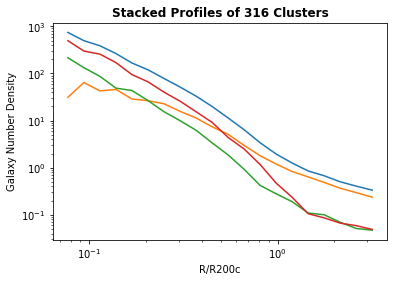

In [118]:
#COLOR SPLIT PROFILES:

bins = 20#30#15
Rmin = .1
Rmax = 5#5.5 # for R200c#7
Halo_Rmax = 5
red1_ratio2 = []
red2_ratio2 = []
number_red1 = []
number_red2 = []

t0 = time.time()
print('starting halo loop')
for h_i in halo_array_masked[:]:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos from Illustris Algorithm:",N_subhalos, time.time()-t0)
    
    # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    
    CM_halo = halo_grp['GroupPos'][h_i]
    redshift = header['Redshift']
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
    #print('before dev loop:',time.time()-t0)
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
    print(len(CM_coords),len(r_subhalo_all), 'time', time.time()-t0)
    # TAKING SUBS IN DISTANCE OF HALO CENTER
    r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
    subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
    print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi), time.time()-t0)
    Rmax_list.append(max(r_subhalo_hi/RScale))
    '''
    plt.figure()
    plt.scatter(subhalo_table_hi['SubhaloCM'][:,0],subhalo_table_hi['SubhaloCM'][:,1],s=1)
    plt.title('Halo %s' %(h_i))
    plt.figure()
    plt.hist(r_subhalo_hi,bins=100)
    plt.show()
    '''
  
    # COLOR CUTS
    mag = subhalo_table_hi['SubhaloStellarPhotometrics']
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    red1_ratio2.extend(((subhalo_table_hi['SubhaloMass'][red_mask_subs])/(halo_grp['GroupMass'][h_i])).tolist())
    red2_ratio2.extend(((subhalo_table_hi['SubhaloMass'][green_mask_subs])/(halo_grp['GroupMass'][h_i])).tolist())
    
    # MAKING PROFILE
    NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(Rmin,Rmax,bins,r_subhalo_hi,blue_mask_subs,red_mask_subs,green_mask_subs)    


    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)
    number_red1.append(sum(galaxies_red))
    number_red2.append(sum(galaxies_green))
        
    print("sum of galaxies:", sum(galaxies))
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_b.append(NDensity_blue)
    NDensity_list_r.append(NDensity_red)
    NDensity_list_g.append(NDensity_green)


# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack1 = R_avg*(bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_b = np.mean(NDensity_list_b, axis=0)
NDensity_stack_r = np.mean(NDensity_list_r, axis=0)
NDensity_stack_g = np.mean(NDensity_list_g, axis=0)
plt.figure()
plt.plot(bin_stack1, NDensity_stack, '-')
plt.plot(bin_stack1, NDensity_stack_b, '-')
plt.plot(bin_stack1, NDensity_stack_r, '-')
plt.plot(bin_stack1, NDensity_stack_g, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg1, cov1, boot_err1 = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue1, cov_blue1, boot_err_blue1 = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red1, cov_red1, boot_err_red1 = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green1, cov_green1, boot_err_green1 = Bootstrap_Covariance(NDensity_list_g, 300, bins)
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack1, (Yi_avg1), 1000,w,p)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack1, (Yi_avg_blue1), 1000,w,p)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack1, (Yi_avg_red1), 1000,w,p)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack1, (Yi_avg_green1), 1000,w,p)  

print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack1, Yi_avg1, yerr = boot_err1, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack1, Yi_avg_blue1, yerr = boot_err_blue1, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack1, Yi_avg_red1, yerr = boot_err_red1, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack1, Yi_avg_green1, yerr = boot_err_green1, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Cluster > 5*10^13)(Stellar Mass > 10^%s, Color: %s)' %(Number_of_halos, bins, M, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(2.8,-4.5,'SG: %s,%s'%(w,p))


Time: 685.0162808895111


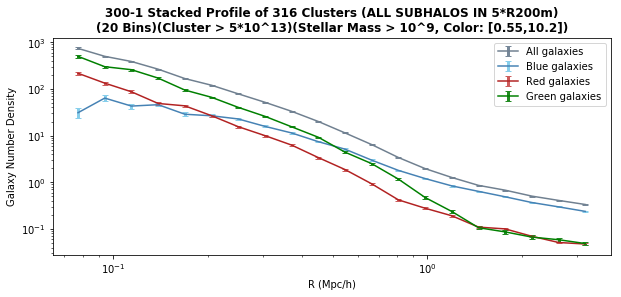

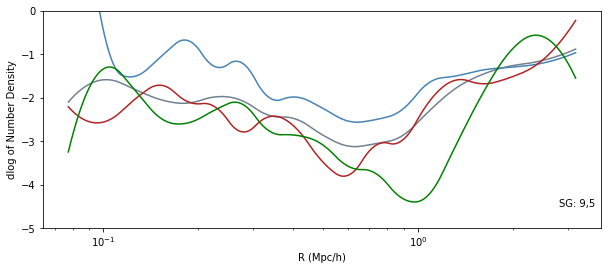

In [119]:
# REPLOTTING AND ADJUSTING (NEW ALL SUBS/TABLE)

w = 9#9
p = 5#5

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg1, cov1, boot_err1 = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue1, cov_blue1, boot_err_blue1 = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red1, cov_red1, boot_err_red1 = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green1, cov_green1, boot_err_green1 = Bootstrap_Covariance(NDensity_list_g, 300, bins)

dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack1, (Yi_avg1), 1000,w,p)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack1, (Yi_avg_blue1), 1000,w,p)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack1, (Yi_avg_red1), 1000,w,p)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack1, (Yi_avg_green1), 1000,w,p)  

print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack1, Yi_avg1, yerr = boot_err1, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack1, Yi_avg_blue1, yerr = boot_err_blue1, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack1, Yi_avg_red1, yerr = boot_err_red1, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack1, Yi_avg_green1, yerr = boot_err_green1, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
#plt.plot(xx_fine, yy_fine, c = 'orange')
#plt.plot(xx_fine_b, yy_fine_b, c = 'orange')
#plt.plot(xx_fine_r, yy_fine_r, c = 'orange')
#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')

#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN %s*R200m)\n (%s Bins)(Cluster > 5*10^13)(Stellar Mass > 10^%s, Color: %s)' %(Number_of_halos, Halo_Rmax, bins, M,color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(2.8,-4.5,'SG: %s,%s'%(w,p))
plt.ylim(-5,0)
plt.show()


## Dynamical Friction Test


Halo: 0
Halo Mass: 87453.625
N Subhalos from Illustris Algorithm: 5464 0.09123611450195312
R500c, R200c, R200m: 0.7612624597816122 1.24644093717065 1.5473688588641492
before dev loop: 0.1545422077178955
232118 232118 time 0.18443703651428223
N Subhalos within 5*R200m: 1175 0.7283079624176025
galaxies [4, 8, 14, 20, 16, 27, 32, 21, 25, 59, 52, 35, 29, 32, 19, 39, 70, 122, 290, 243]
blue galaxies counted [0, 0, 0, 2, 1, 4, 3, 5, 3, 6, 6, 9, 4, 18, 15, 32, 40, 67, 96, 155]
red galaxies counted [2, 1, 7, 3, 4, 6, 8, 4, 6, 15, 11, 8, 8, 5, 2, 4, 11, 18, 64, 34]
red galaxies counted [2, 7, 7, 15, 11, 17, 21, 12, 16, 38, 35, 18, 17, 9, 2, 3, 19, 37, 130, 54]
sum of galaxies: 1157

Halo: 1
Halo Mass: 57760.027
N Subhalos from Illustris Algorithm: 3959 0.7513110637664795
R500c, R200c, R200m: 0.5860514830407864 0.916949635434108 1.1697442162737657
before dev loop: 0.7565782070159912
232118 232118 time 0.7728931903839111
N Subhalos within 5*R200m: 550 0.9025821685791016
galaxies [5, 7, 10, 7, 5,

N Subhalos within 5*R200m: 383 2.90191912651062
galaxies [2, 4, 3, 2, 8, 7, 10, 10, 15, 7, 14, 15, 20, 6, 3, 6, 12, 58, 112, 61]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 8, 1, 1, 4, 8, 27, 33, 48]
red galaxies counted [1, 3, 1, 0, 2, 5, 0, 2, 2, 1, 4, 3, 2, 0, 0, 1, 3, 10, 28, 6]
red galaxies counted [1, 1, 2, 2, 6, 0, 10, 7, 11, 5, 9, 10, 10, 5, 2, 1, 1, 21, 51, 7]
sum of galaxies: 375

Halo: 15
Halo Mass: 25923.64
N Subhalos from Illustris Algorithm: 1930 2.9114222526550293
R500c, R200c, R200m: 0.5543512035580016 0.8399260732759634 1.0439992872395611
before dev loop: 2.927420139312744
232118 232118 time 2.961153030395508
N Subhalos within 5*R200m: 434 3.021531105041504
galaxies [3, 2, 4, 12, 13, 6, 9, 4, 8, 10, 18, 13, 15, 17, 7, 10, 15, 33, 134, 95]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 1, 3, 3, 6, 8, 10, 2, 9, 12, 13, 27, 49]
red galaxies counted [0, 1, 2, 5, 2, 1, 4, 2, 2, 0, 2, 4, 2, 3, 3, 0, 1, 8, 27, 15]
red galaxies counted [3, 1, 2, 7, 10, 5, 4, 1, 

N Subhalos within 5*R200m: 158 4.050400018692017
galaxies [1, 3, 1, 2, 4, 2, 6, 8, 6, 18, 16, 9, 9, 2, 6, 7, 7, 15, 13, 18]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 1, 2, 5, 2, 4, 0, 4, 7, 7, 10, 13, 17]
red galaxies counted [1, 2, 0, 0, 2, 1, 2, 0, 2, 4, 4, 1, 0, 1, 2, 0, 0, 4, 0, 0]
red galaxies counted [0, 1, 1, 2, 2, 0, 3, 5, 3, 12, 7, 6, 5, 1, 0, 0, 0, 1, 0, 1]
sum of galaxies: 153

Halo: 29
Halo Mass: 18336.77
N Subhalos from Illustris Algorithm: 1211 4.057501316070557
R500c, R200c, R200m: 0.37254839425574054 0.582633141407676 0.7267309038611021
before dev loop: 4.071339130401611
232118 232118 time 4.0868470668792725
N Subhalos within 5*R200m: 212 4.1104042530059814
galaxies [0, 2, 2, 3, 0, 3, 2, 2, 7, 4, 6, 4, 3, 9, 17, 32, 15, 17, 24, 56]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 5, 6, 8, 7, 14, 17, 26]
red galaxies counted [0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 3, 9, 2, 1, 5, 14]
red galaxies counted [0, 1, 0, 2, 0, 2, 2, 1, 4, 3, 5, 3, 1, 4, 8, 1

232118 232118 time 4.926072120666504
N Subhalos within 5*R200m: 149 4.956920146942139
galaxies [2, 2, 4, 5, 4, 5, 3, 6, 7, 4, 8, 4, 10, 10, 8, 3, 2, 18, 10, 31]
blue galaxies counted [0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 3, 1, 4, 7, 3, 3, 2, 11, 9, 26]
red galaxies counted [1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 3, 2, 0, 0, 6, 0, 3]
red galaxies counted [1, 1, 3, 5, 3, 3, 2, 4, 3, 2, 4, 2, 4, 0, 3, 0, 0, 1, 1, 2]
sum of galaxies: 146

Halo: 46
Halo Mass: 14551.992
N Subhalos from Illustris Algorithm: 1044 4.961241245269775
R500c, R200c, R200m: 0.44943243635074304 0.702010991290626 0.8500623960268822
before dev loop: 4.965331315994263
232118 232118 time 4.980805158615112
N Subhalos within 5*R200m: 217 5.005075931549072
galaxies [1, 1, 4, 2, 4, 7, 7, 11, 7, 10, 8, 4, 7, 1, 6, 8, 9, 33, 28, 54]
blue galaxies counted [0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 3, 2, 7, 0, 5, 5, 8, 19, 23, 26]
red galaxies counted [0, 0, 1, 2, 1, 2, 0, 2, 3, 1, 4, 1, 0, 1, 1, 2, 1, 9, 3, 13]
red galaxies counted [1, 1, 1, 0, 1

before dev loop: 5.780542373657227
232118 232118 time 5.8061230182647705
N Subhalos within 5*R200m: 133 5.83671498298645
galaxies [0, 5, 3, 2, 5, 1, 8, 10, 8, 6, 4, 3, 2, 3, 7, 1, 4, 12, 11, 33]
blue galaxies counted [0, 2, 2, 1, 1, 0, 4, 5, 2, 4, 1, 1, 1, 2, 7, 1, 4, 10, 8, 20]
red galaxies counted [0, 1, 0, 1, 3, 0, 1, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 3]
red galaxies counted [0, 2, 1, 0, 1, 1, 3, 2, 6, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 10]
sum of galaxies: 128

Halo: 62
Halo Mass: 13000.34
N Subhalos from Illustris Algorithm: 1047 5.841100215911865
R500c, R200c, R200m: 0.4069041589001368 0.6331709514128275 0.782193111526722
before dev loop: 5.846043109893799
232118 232118 time 5.8620781898498535
N Subhalos within 5*R200m: 102 5.88681697845459
galaxies [1, 0, 5, 2, 4, 5, 4, 6, 8, 5, 7, 4, 2, 7, 2, 5, 1, 10, 9, 10]
blue galaxies counted [0, 0, 0, 1, 0, 1, 0, 4, 4, 2, 2, 0, 1, 4, 2, 4, 1, 10, 8, 9]
red galaxies counted [1, 0, 0, 0, 3, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1]
red gala

galaxies [2, 0, 2, 4, 1, 5, 2, 12, 4, 5, 5, 1, 0, 1, 4, 4, 11, 15, 5, 24]
blue galaxies counted [0, 0, 1, 0, 0, 2, 1, 2, 1, 4, 3, 1, 0, 1, 4, 4, 9, 14, 5, 21]
red galaxies counted [0, 0, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2]
red galaxies counted [2, 0, 1, 3, 1, 2, 1, 7, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
sum of galaxies: 107

Halo: 77
Halo Mass: 11230.451
N Subhalos from Illustris Algorithm: 867 6.649877071380615
R500c, R200c, R200m: 0.33468521132386064 0.5361607498736738 0.7291663596777985
before dev loop: 6.6581010818481445
232118 232118 time 6.685178279876709
N Subhalos within 5*R200m: 98 6.704901218414307
galaxies [0, 0, 0, 2, 2, 1, 1, 2, 5, 6, 6, 12, 4, 3, 4, 4, 3, 14, 5, 21]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 4, 3, 12, 5, 18]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 2]
red galaxies counted [0, 0, 0, 2, 2, 1, 1, 0, 3, 4, 4, 6, 2, 1, 1, 0, 0, 0, 0, 1]
sum of galaxies: 95

Halo: 78
Halo Mass: 110

red galaxies counted [1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 3, 1, 2, 1, 3, 2, 1, 0, 5, 34]
sum of galaxies: 174

Halo: 93
Halo Mass: 10238.875
N Subhalos from Illustris Algorithm: 821 7.499176263809204
R500c, R200c, R200m: 0.4012219491090465 0.6205032903341002 0.7695008292603813
before dev loop: 7.509339094161987
232118 232118 time 7.530188083648682
N Subhalos within 5*R200m: 152 7.553907155990601
galaxies [0, 3, 2, 2, 4, 2, 4, 6, 10, 5, 9, 1, 3, 3, 9, 8, 12, 6, 16, 44]
blue galaxies counted [0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 7, 7, 11, 6, 11, 23]
red galaxies counted [0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 3, 14]
red galaxies counted [0, 3, 1, 0, 1, 0, 3, 3, 6, 3, 6, 0, 2, 1, 0, 0, 1, 0, 2, 7]
sum of galaxies: 149

Halo: 94
Halo Mass: 10289.019
N Subhalos from Illustris Algorithm: 856 7.555555105209351
R500c, R200c, R200m: 0.3173017320764785 0.5507157951293802 0.6841214365430489
before dev loop: 7.561980247497559
232118 232118 time 7.5771400928497314
N Subhalos within 5*

N Subhalos within 5*R200m: 95 8.33209228515625
galaxies [0, 1, 1, 0, 0, 3, 1, 2, 2, 3, 2, 16, 2, 2, 5, 11, 11, 11, 5, 14]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 1, 3, 6, 5, 9, 5, 10]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 4, 2, 0, 2]
red galaxies counted [0, 1, 0, 0, 0, 3, 1, 2, 2, 1, 0, 11, 0, 1, 2, 3, 2, 0, 0, 2]
sum of galaxies: 92

Halo: 109
Halo Mass: 9206.317
N Subhalos from Illustris Algorithm: 698 8.335634231567383
R500c, R200c, R200m: 0.3922152784733877 0.5971815009099979 0.7320837502204935
before dev loop: 8.35228419303894
232118 232118 time 8.378889083862305
N Subhalos within 5*R200m: 145 8.40407133102417
galaxies [2, 1, 0, 0, 2, 4, 5, 3, 11, 6, 6, 2, 0, 5, 17, 7, 7, 18, 25, 19]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 2, 1, 0, 5, 10, 6, 6, 13, 20, 17]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 3, 0, 1, 4, 4, 2]
red galaxies counted [2, 1, 0, 0, 2, 3, 4, 1, 5, 4, 4, 0, 0, 0, 4, 1, 0, 1, 1,

N Subhalos within 5*R200m: 71 9.00971007347107
galaxies [1, 0, 1, 0, 1, 1, 1, 4, 3, 1, 0, 5, 10, 7, 1, 1, 6, 9, 11, 6]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 3, 3, 1, 1, 3, 6, 10, 6]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 3, 2, 1, 0]
red galaxies counted [0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 6, 2, 0, 0, 0, 1, 0, 0]
sum of galaxies: 69

Halo: 122
Halo Mass: 9256.363
N Subhalos from Illustris Algorithm: 639 9.015391111373901
R500c, R200c, R200m: 0.34896570031183993 0.5320360403799955 0.6717327755561545
before dev loop: 9.019293308258057
232118 232118 time 9.058362245559692
N Subhalos within 5*R200m: 147 9.086560010910034
galaxies [4, 1, 1, 2, 1, 1, 4, 1, 4, 2, 5, 8, 5, 7, 4, 8, 16, 8, 20, 40]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 5, 1, 4, 1, 1, 7, 7, 19, 29]
red galaxies counted [0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 2, 5, 1, 1, 8]
red galaxies counted [4, 0, 0, 1, 1, 0, 1, 0, 4, 2, 3, 3, 3, 2, 3, 5, 4, 0, 0, 3]
s

N Subhalos within 5*R200m: 151 9.929686069488525
galaxies [0, 0, 1, 1, 5, 4, 6, 11, 5, 5, 2, 5, 3, 4, 5, 4, 7, 12, 19, 49]
blue galaxies counted [0, 0, 0, 0, 1, 2, 1, 3, 2, 3, 2, 3, 3, 3, 4, 4, 6, 10, 12, 23]
red galaxies counted [0, 0, 0, 1, 2, 1, 1, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 4, 6]
red galaxies counted [0, 0, 1, 0, 2, 1, 4, 4, 3, 2, 0, 2, 0, 1, 0, 0, 1, 1, 3, 20]
sum of galaxies: 148

Halo: 136
Halo Mass: 8715.005
N Subhalos from Illustris Algorithm: 669 9.935208320617676
R500c, R200c, R200m: 0.3718167646563368 0.5763609038717971 0.715964038500574
before dev loop: 9.941290140151978
232118 232118 time 9.962481260299683
N Subhalos within 5*R200m: 139 9.985268115997314
galaxies [1, 4, 2, 1, 3, 3, 3, 2, 5, 6, 10, 6, 2, 6, 3, 3, 6, 18, 34, 13]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 0, 0, 3, 1, 3, 6, 12, 10, 10]
red galaxies counted [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 3, 8, 2]
red galaxies counted [0, 3, 1, 1, 3, 2, 2, 1, 3, 3, 6, 6, 0, 1, 2, 0, 0, 3,

232118 232118 time 10.586072206497192
N Subhalos within 5*R200m: 97 10.616496086120605
galaxies [0, 2, 0, 0, 3, 1, 1, 5, 2, 5, 8, 1, 2, 5, 5, 2, 9, 6, 17, 17]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 5, 0, 1, 1, 4, 2, 7, 6, 17, 12]
red galaxies counted [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 5]
red galaxies counted [0, 1, 0, 0, 2, 1, 0, 3, 2, 1, 1, 1, 0, 4, 0, 0, 0, 0, 0, 0]
sum of galaxies: 91

Halo: 149
Halo Mass: 8279.199
N Subhalos from Illustris Algorithm: 669 10.620618104934692
R500c, R200c, R200m: 0.3564033807625338 0.5670571776067224 0.7089757848013387
before dev loop: 10.626007080078125
232118 232118 time 10.641810178756714
N Subhalos within 5*R200m: 88 10.664220333099365
galaxies [3, 1, 1, 1, 3, 1, 2, 2, 4, 10, 4, 7, 4, 1, 1, 5, 5, 11, 7, 14]
blue galaxies counted [1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 4, 2, 1, 1, 4, 5, 6, 6, 14]
red galaxies counted [0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 3, 1, 0]
red galaxies counted [2, 0, 1, 0, 0, 1, 2

232118 232118 time 12.182979106903076
N Subhalos within 5*R200m: 91 12.227724075317383
galaxies [0, 4, 1, 0, 2, 3, 3, 3, 6, 5, 1, 6, 3, 2, 5, 3, 6, 6, 13, 13]
blue galaxies counted [0, 0, 0, 0, 1, 3, 1, 2, 3, 1, 1, 0, 2, 2, 5, 2, 6, 6, 11, 11]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2]
red galaxies counted [0, 4, 0, 0, 1, 0, 1, 1, 2, 3, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 164
Halo Mass: 7866.6455
N Subhalos from Illustris Algorithm: 695 12.230478048324585
R500c, R200c, R200m: 0.3497964952473708 0.5679393767778557 0.702229419257485
before dev loop: 12.236560106277466
232118 232118 time 12.259187936782837
N Subhalos within 5*R200m: 168 12.286010265350342
galaxies [0, 1, 0, 2, 2, 0, 6, 5, 3, 9, 8, 2, 1, 5, 3, 2, 10, 20, 39, 47]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 4, 1, 0, 5, 3, 2, 10, 14, 13, 20]
red galaxies counted [0, 1, 0, 0, 0, 0, 2, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 2, 12, 11]
red galaxies counted [0, 0, 0, 1, 

N Subhalos within 5*R200m: 106 12.905380249023438
galaxies [0, 2, 2, 0, 0, 1, 2, 1, 2, 3, 2, 4, 5, 3, 11, 6, 8, 12, 10, 30]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 5, 1, 3, 5, 8, 10, 8, 19]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 5, 0, 0, 1, 0, 5]
red galaxies counted [0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 1, 2, 6]
sum of galaxies: 104

Halo: 177
Halo Mass: 7628.1685
N Subhalos from Illustris Algorithm: 820 12.907092094421387
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
before dev loop: 12.913109064102173
232118 232118 time 12.929017066955566
N Subhalos within 5*R200m: 75 12.948768138885498
galaxies [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 5, 4, 9, 7, 2, 4, 8, 11, 8, 11]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 2, 3, 4, 2, 4, 7, 7, 8, 9]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 3, 0, 2]
red galaxies counted [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 4, 3, 0, 0, 0, 1

N Subhalos within 5*R200m: 62 13.62759804725647
galaxies [2, 0, 2, 1, 1, 5, 1, 1, 3, 4, 6, 2, 0, 4, 3, 5, 2, 5, 2, 8]
blue galaxies counted [0, 0, 1, 1, 1, 2, 0, 1, 3, 1, 3, 2, 0, 3, 3, 3, 2, 3, 2, 7]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1]
red galaxies counted [2, 0, 1, 0, 0, 2, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 57

Halo: 190
Halo Mass: 7046.362
N Subhalos from Illustris Algorithm: 669 13.632862329483032
R500c, R200c, R200m: 0.2690153194976947 0.45795633153692383 0.5738119503853708
before dev loop: 13.639916181564331
232118 232118 time 13.658849000930786
N Subhalos within 5*R200m: 82 13.678670167922974
galaxies [2, 1, 0, 0, 0, 1, 2, 1, 3, 3, 3, 1, 4, 8, 3, 4, 4, 14, 7, 18]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 3, 1, 2, 1, 3, 2, 4, 14, 6, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 5]
red galaxies counted [2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 4, 0, 2, 0, 0, 0, 0]
s

N Subhalos within 5*R200m: 81 14.284810066223145
galaxies [0, 0, 0, 1, 0, 4, 3, 6, 3, 3, 6, 3, 2, 3, 0, 4, 4, 3, 17, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 0, 4, 4, 3, 11, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 3, 1]
red galaxies counted [0, 0, 0, 1, 0, 4, 2, 4, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0, 3, 1]
sum of galaxies: 77

Halo: 204
Halo Mass: 6706.4194
N Subhalos from Illustris Algorithm: 525 14.286222219467163
R500c, R200c, R200m: 0.321439853111377 0.4772940124606779 0.5869305595247102
before dev loop: 14.2898690700531
232118 232118 time 14.316763162612915
N Subhalos within 5*R200m: 50 14.345525979995728
galaxies [0, 1, 2, 0, 0, 1, 5, 3, 1, 0, 0, 3, 3, 8, 5, 2, 4, 1, 3, 7]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 2, 5, 3, 2, 2, 1, 3, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
red galaxies counted [0, 1, 2, 0, 0, 0, 4, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0]
sum

232118 232118 time 14.948438167572021
N Subhalos within 5*R200m: 57 14.981134176254272
galaxies [0, 0, 2, 1, 4, 2, 1, 3, 1, 3, 2, 3, 0, 1, 1, 1, 5, 3, 9, 13]
blue galaxies counted [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 5, 3, 9, 10]
red galaxies counted [0, 0, 0, 0, 3, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
red galaxies counted [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2]
sum of galaxies: 55

Halo: 218
Halo Mass: 6492.1763
N Subhalos from Illustris Algorithm: 561 14.982672214508057
R500c, R200c, R200m: 0.30844132730902335 0.47219562507440865 0.5923494627289179
before dev loop: 14.988808155059814
232118 232118 time 15.005073308944702
N Subhalos within 5*R200m: 55 15.025268077850342
galaxies [0, 0, 2, 2, 0, 1, 2, 2, 1, 4, 0, 4, 6, 6, 0, 1, 6, 6, 3, 7]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1, 4, 6, 2, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0]
red galaxies counted [0, 0, 2, 2, 0, 0, 1, 1

N Subhalos within 5*R200m: 60 15.601149320602417
galaxies [3, 0, 1, 1, 0, 3, 1, 3, 2, 0, 2, 5, 4, 1, 6, 1, 1, 2, 8, 12]
blue galaxies counted [0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 4, 0, 1, 6, 1, 1, 2, 6, 10]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1]
red galaxies counted [3, 0, 1, 1, 0, 1, 0, 3, 1, 0, 1, 1, 4, 0, 0, 0, 0, 0, 0, 1]
sum of galaxies: 56

Halo: 231
Halo Mass: 5988.988
N Subhalos from Illustris Algorithm: 474 15.609163045883179
R500c, R200c, R200m: 0.32520951707278106 0.49848961220517773 0.626345677965257
before dev loop: 15.622839212417603
232118 232118 time 15.643992185592651
N Subhalos within 5*R200m: 74 15.668869256973267
galaxies [1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 4, 6, 4, 1, 0, 2, 7, 1, 6, 27]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 1, 0, 1, 6, 1, 6, 20]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 3]
red galaxies counted [1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 4]


N Subhalos within 5*R200m: 72 16.346655130386353
galaxies [0, 0, 0, 1, 0, 0, 0, 4, 2, 2, 2, 2, 4, 5, 2, 2, 3, 12, 9, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 3, 2, 2, 2, 10, 9, 15]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 67

Halo: 245
Halo Mass: 5983.657
N Subhalos from Illustris Algorithm: 609 16.348215103149414
R500c, R200c, R200m: 0.2623690400823504 0.408838463454161 0.5164104338593012
before dev loop: 16.361064195632935
232118 232118 time 16.398391008377075
N Subhalos within 5*R200m: 57 16.424599170684814
galaxies [1, 0, 2, 1, 0, 0, 1, 2, 1, 3, 3, 3, 3, 1, 0, 1, 14, 7, 9, 4]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 7, 4, 8, 4]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 5, 1, 1, 0]
red galaxies counted [1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0]
s

before dev loop: 17.198984146118164
232118 232118 time 17.22380805015564
N Subhalos within 5*R200m: 63 17.24748921394348
galaxies [0, 0, 0, 1, 3, 2, 2, 2, 6, 5, 4, 1, 3, 2, 5, 2, 1, 6, 4, 10]
blue galaxies counted [0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 3, 2, 5, 2, 1, 4, 3, 10]
red galaxies counted [0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 0, 1, 1, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0]
sum of galaxies: 59

Halo: 263
Halo Mass: 5607.6855
N Subhalos from Illustris Algorithm: 481 17.24896216392517
R500c, R200c, R200m: 0.3161559060428514 0.4853225613796399 0.6059943247319596
before dev loop: 17.25337028503418
232118 232118 time 17.26941418647766
N Subhalos within 5*R200m: 113 17.289334058761597
galaxies [0, 2, 0, 0, 2, 1, 2, 5, 5, 1, 3, 4, 3, 3, 3, 2, 4, 13, 14, 43]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 2, 3, 0, 3, 2, 2, 3, 2, 2, 4, 10, 13, 26]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 7]
red gala

232118 232118 time 17.87168526649475
N Subhalos within 5*R200m: 69 17.891921281814575
galaxies [0, 0, 1, 3, 2, 0, 2, 1, 0, 2, 0, 0, 7, 4, 3, 0, 7, 6, 7, 23]
blue galaxies counted [0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 6, 2, 3, 0, 5, 6, 7, 21]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2]
red galaxies counted [0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 68

Halo: 276
Halo Mass: 5381.3813
N Subhalos from Illustris Algorithm: 398 17.897983074188232
R500c, R200c, R200m: 0.33402358196273635 0.5072069938949929 0.625016334006395
before dev loop: 17.903685092926025
232118 232118 time 17.918469190597534
N Subhalos within 5*R200m: 68 17.93804907798767
galaxies [1, 2, 1, 0, 1, 1, 4, 2, 1, 4, 0, 2, 1, 1, 6, 5, 2, 9, 8, 15]
blue galaxies counted [0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 4, 4, 2, 8, 6, 12]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 3]
red galaxies counted [1, 0, 1, 0, 1, 1, 2, 0, 

N Subhalos within 5*R200m: 49 18.52519917488098
galaxies [0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 5, 1, 4, 1, 2, 5, 9, 8]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 3, 0, 4, 1, 2, 5, 9, 7]
red galaxies counted [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1]
red galaxies counted [0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 48

Halo: 289
Halo Mass: 5268.219
N Subhalos from Illustris Algorithm: 453 18.526544094085693
R500c, R200c, R200m: 0.2947966054265615 0.4896038456127583 0.6121466590858843
before dev loop: 18.5320041179657
232118 232118 time 18.570127248764038
N Subhalos within 5*R200m: 64 18.58957815170288
galaxies [0, 0, 0, 0, 0, 3, 1, 5, 4, 4, 4, 2, 0, 1, 0, 5, 1, 6, 14, 12]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 3, 2, 3, 1, 0, 1, 0, 5, 0, 3, 10, 11]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3, 1]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
sum o

before dev loop: 19.21812605857849
232118 232118 time 19.232868194580078
N Subhalos within 5*R200m: 83 19.27587103843689
galaxies [1, 0, 0, 2, 2, 1, 1, 3, 3, 2, 4, 8, 2, 5, 2, 1, 2, 11, 7, 21]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 5, 2, 1, 2, 9, 5, 19]
red galaxies counted [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2]
red galaxies counted [0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 4, 1, 0, 0, 0, 0, 2, 1, 0]
sum of galaxies: 78

Halo: 305
Halo Mass: 5160.0137
N Subhalos from Illustris Algorithm: 485 19.27741312980652
R500c, R200c, R200m: 0.3141987418170756 0.47801114958867347 0.5914917646420437
before dev loop: 19.281028270721436
232118 232118 time 19.297378063201904
N Subhalos within 5*R200m: 55 19.31681728363037
galaxies [0, 2, 1, 1, 1, 3, 4, 1, 4, 2, 1, 3, 5, 1, 0, 3, 3, 7, 4, 7]
blue galaxies counted [0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 3, 1, 0, 3, 2, 5, 3, 5]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1]
red galaxies

(-5, 0)

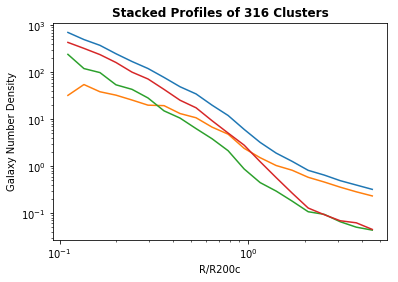

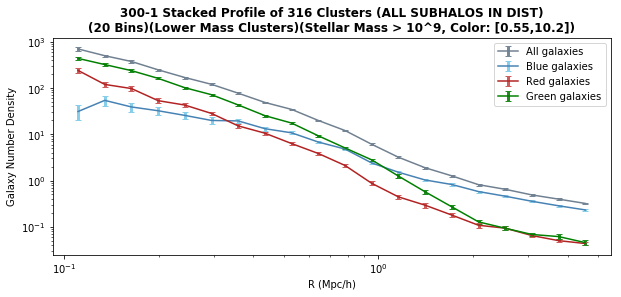

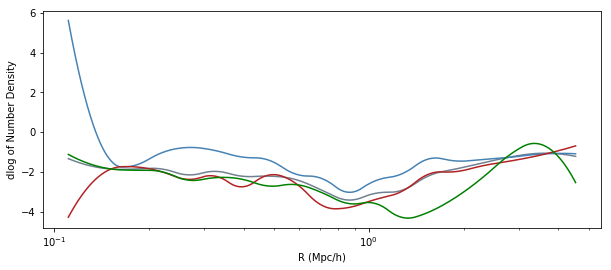

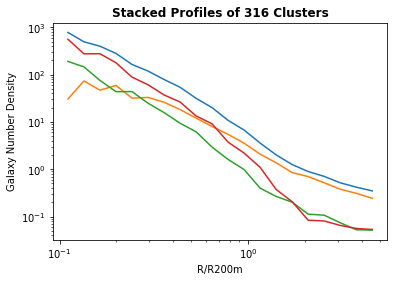

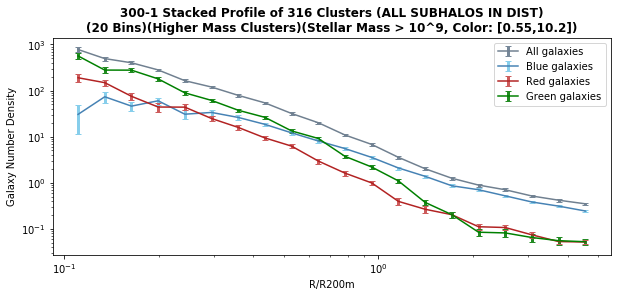

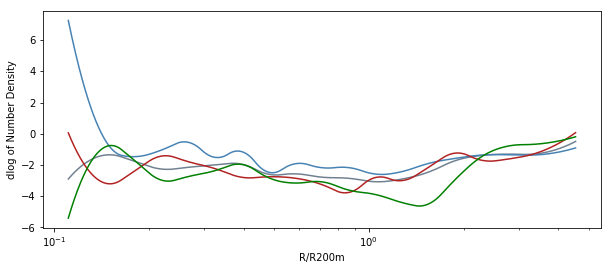

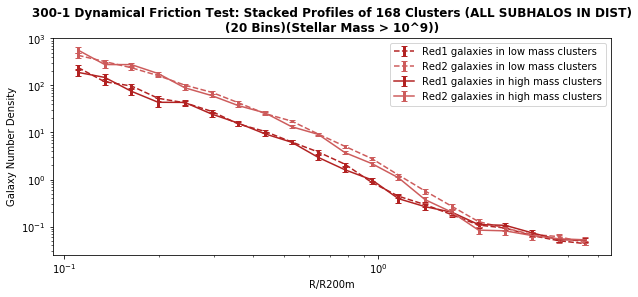

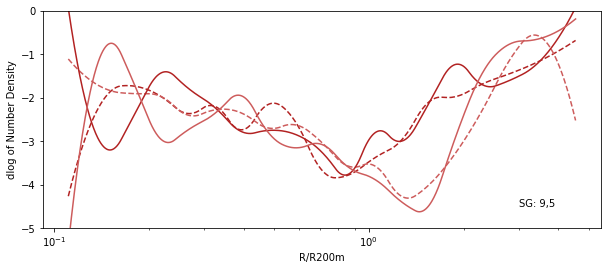

In [75]:
'''
halo_array1=halo_array_masked[:int(len(halo_array_masked)/2)]
halo_array2=halo_array_masked[int(len(halo_array_masked)/2):]
plt.plot(halo_array1,np.log10(halo_grp['GroupMass'][halo_array1]))
plt.plot(halo_array2,np.log10(halo_grp['GroupMass'][halo_array2]))
print(halo_grp['GroupMass'][int(len(halo_array_masked)/2)])
print(len(NDensity_list_g1), len(NDensity_list_g2))
'''
t0 = time.time()
w = 9
p=5
# TESTING FOR DYNAMICAL FRICTION:
halo_array1=halo_array_masked[:int(len(halo_array_masked)/2)]
halo_array2=halo_array_masked[int(len(halo_array_masked)/2):]
#print(halo_array1,halo_array2)
bins = 20#30#15
Rmin = .1
Rmax = 5#5.5 # for R200c#7
Halo_Rmax = 5
redshift = header['Redshift']
boxsize = header['BoxSize'] #kpc/h
box_bounds = boxsize*np.ones(3)#*conv_fac

NDensity_list1 = []
NDensity_list_b1 = []
NDensity_list_r1 = []
NDensity_list_g1 = []
ND_boot1 = []
ND_boot_b1 = []
ND_boot_r1 = []
ND_boot_g1 = []
RScale_list1 = []


red1_ratio21 = []
red2_ratio21 = []
number_red11 = []
number_red21 = []
for h_i1 in halo_array1:
    print("\nHalo:", h_i1)
    print("Halo Mass:", halo_grp['GroupMass'][h_i1])
    N_subhalos = halo_grp['GroupNsubs'][h_i1]
    print("N Subhalos from Illustris Algorithm:",N_subhalos, time.time()-t0)
    
    # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i1] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i1]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i1]
    #M200m = halo_grp['Group_M_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list1.append(RScale)
    
    CM_halo = halo_grp['GroupPos'][h_i1]
    dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
    print('before dev loop:',time.time()-t0)
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
    print(len(CM_coords),len(r_subhalo_all), 'time', time.time()-t0)
    # TAKING SUBS IN DISTANCE OF HALO CENTER
    r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
    subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
    print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi), time.time()-t0)
    
    # COLOR CUTS
    mag = subhalo_table_hi['SubhaloStellarPhotometrics']
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title1 = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    red1_ratio21.extend(((subhalo_table_hi['SubhaloMass'][red_mask_subs])/(halo_grp['GroupMass'][h_i1])).tolist())
    red2_ratio21.extend(((subhalo_table_hi['SubhaloMass'][green_mask_subs])/(halo_grp['GroupMass'][h_i1])).tolist())
    
    NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(Rmin,Rmax,bins,r_subhalo_hi,blue_mask_subs,red_mask_subs,green_mask_subs)    

    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)
    number_red11.append(sum(galaxies_red))
    number_red21.append(sum(galaxies_green))
        
    print("sum of galaxies:", sum(galaxies))

    NDensity_list1.append(NDensity) #/M200m
    NDensity_list_b1.append(NDensity_blue)
    NDensity_list_r1.append(NDensity_red)
    NDensity_list_g1.append(NDensity_green)


# RADIAL BINS, R_AVG, ETC
R_avg1 = np.mean(RScale_list1) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack11 = (bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack1 = np.mean(NDensity_list1, axis=0)
NDensity_stack_b1 = np.mean(NDensity_list_b1, axis=0)
NDensity_stack_r1 = np.mean(NDensity_list_r1, axis=0)
NDensity_stack_g1 = np.mean(NDensity_list_g1, axis=0)
plt.figure()
plt.plot(bin_stack11, NDensity_stack1, '-')
plt.plot(bin_stack11, NDensity_stack_b1, '-')
plt.plot(bin_stack11, NDensity_stack_r1, '-')
plt.plot(bin_stack11, NDensity_stack_g1, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg11, cov11, boot_err11 = Bootstrap_Covariance(NDensity_list1, 300, bins)
Yi_avg_blue11, cov_blue11, boot_err_blue11 = Bootstrap_Covariance(NDensity_list_b1, 300, bins)
Yi_avg_red11, cov_red11, boot_err_red11 = Bootstrap_Covariance(NDensity_list_r1, 300, bins)
Yi_avg_green11, cov_green11, boot_err_green11 = Bootstrap_Covariance(NDensity_list_g1, 300, bins)
dlog_data_SG_x1, dlog_data_SG_y1, yy_fine1, xx_fine1 = get_slope_sg(bin_stack11, (Yi_avg11), 1000,w,p)  
dlog_data_SG_x_b1, dlog_data_SG_y_b1, yy_fine_b1, xx_fine_b1 = get_slope_sg(bin_stack11, (Yi_avg_blue11), 1000,w,p)  
dlog_data_SG_x_r1, dlog_data_SG_y_r1, yy_fine_r1, xx_fine_r1 = get_slope_sg(bin_stack11, (Yi_avg_red11), 1000,w,p)  
dlog_data_SG_x_g1, dlog_data_SG_y_g1, yy_fine_g1, xx_fine_g1 = get_slope_sg(bin_stack11, (Yi_avg_green11), 1000,w,p)  

print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack11, Yi_avg11, yerr = boot_err11, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack11, Yi_avg_blue11, yerr = boot_err_blue11, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack11, Yi_avg_red11, yerr = boot_err_red11, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack11, Yi_avg_green11, yerr = boot_err_green1, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Lower Mass Clusters)(Stellar Mass > 10^%s, Color: %s)' %(Number_of_halos, bins, M, color_title1), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x1, dlog_data_SG_y1, c = 'slategrey')
plt.plot(dlog_data_SG_x_b1, dlog_data_SG_y_b1, c = 'steelblue')
plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick')
plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')

# HIGHER MASS CLUSTERS 

NDensity_list2 = []
NDensity_list_b2 = []
NDensity_list_r2 = []
NDensity_list_g2 = []
ND_boot2 = []
ND_boot_b2 = []
ND_boot_r2 = []
ND_boot_g2 = []
RScale_list2 = []

red1_ratio22 = []
red2_ratio22 = []
number_red12 = []
number_red22 = []
for h_i2 in halo_array2:
    print("\nHalo:", h_i2)
    print("Halo Mass:", halo_grp['GroupMass'][h_i2])
    N_subhalos = halo_grp['GroupNsubs'][h_i2]
    print("N Subhalos from Illustris Algorithm:",N_subhalos, time.time()-t0)
    
    # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i2] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i2]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i2]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list2.append(RScale)
    
    CM_halo = halo_grp['GroupPos'][h_i2]
    dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
    print('before dev loop:',time.time()-t0)
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
    print(len(CM_coords),len(r_subhalo_all), 'time', time.time()-t0)
    # TAKING SUBS IN DISTANCE OF HALO CENTER
    r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
    subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
    print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi), time.time()-t0)
    Rmax_list.append(max(r_subhalo_hi/RScale))
    
    # COLOR CUTS
    mag = subhalo_table_hi['SubhaloStellarPhotometrics']
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title2 = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    red1_ratio22.extend(((subhalo_table_hi['SubhaloMass'][red_mask_subs])/(halo_grp['GroupMass'][h_i2])).tolist())
    red2_ratio22.extend(((subhalo_table_hi['SubhaloMass'][green_mask_subs])/(halo_grp['GroupMass'][h_i2])).tolist())
    
    NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(Rmin,Rmax,bins,r_subhalo_hi,blue_mask_subs,red_mask_subs,green_mask_subs)    

    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)
    number_red12.append(sum(galaxies_red))
    number_red22.append(sum(galaxies_green))
        
    print("sum of galaxies:", sum(galaxies))

    NDensity_list2.append(NDensity) #/M200m
    NDensity_list_b2.append(NDensity_blue)
    NDensity_list_r2.append(NDensity_red)
    NDensity_list_g2.append(NDensity_green)


# RADIAL BINS, R_AVG, ETC
R_avg2 = np.mean(RScale_list2) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack12 = (bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack2 = np.mean(NDensity_list2, axis=0)
NDensity_stack_b2 = np.mean(NDensity_list_b2, axis=0)
NDensity_stack_r2 = np.mean(NDensity_list_r2, axis=0)
NDensity_stack_g2 = np.mean(NDensity_list_g2, axis=0)
plt.figure()
plt.plot(bin_stack12, NDensity_stack2, '-')
plt.plot(bin_stack12, NDensity_stack_b2, '-')
plt.plot(bin_stack12, NDensity_stack_r2, '-')
plt.plot(bin_stack12, NDensity_stack_g2, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200m')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg12, cov12, boot_err12 = Bootstrap_Covariance(NDensity_list2, 300, bins)
Yi_avg_blue12, cov_blue12, boot_err_blue12 = Bootstrap_Covariance(NDensity_list_b2, 300, bins)
Yi_avg_red12, cov_red12, boot_err_red12 = Bootstrap_Covariance(NDensity_list_r2, 300, bins)
Yi_avg_green12, cov_green12, boot_err_green12 = Bootstrap_Covariance(NDensity_list_g2, 300, bins)

dlog_data_SG_x2, dlog_data_SG_y2, yy_fine2, xx_fine2 = get_slope_sg(bin_stack12, (Yi_avg12), 1000,w,p)  
dlog_data_SG_x_b2, dlog_data_SG_y_b2, yy_fine_b2, xx_fine_b2 = get_slope_sg(bin_stack12, (Yi_avg_blue12), 1000,w,p)  
dlog_data_SG_x_r2, dlog_data_SG_y_r2, yy_fine_r2, xx_fine_r2 = get_slope_sg(bin_stack12, (Yi_avg_red12), 1000,w,p)  
dlog_data_SG_x_g2, dlog_data_SG_y_g2, yy_fine_g2, xx_fine_g2 = get_slope_sg(bin_stack12, (Yi_avg_green12), 1000,w,p)  

print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack12, Yi_avg12, yerr = boot_err12, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack12, Yi_avg_blue12, yerr = boot_err_blue12, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack12, Yi_avg_red12, yerr = boot_err_red12, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack12, Yi_avg_green12, yerr = boot_err_green12, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Higher Mass Clusters)(Stellar Mass > 10^%s, Color: %s)' %(Number_of_halos, bins, M, color_title2), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x2, dlog_data_SG_y2, c = 'slategrey')
plt.plot(dlog_data_SG_x_b2, dlog_data_SG_y_b2, c = 'steelblue')
plt.plot(dlog_data_SG_x_r2, dlog_data_SG_y_r2, c = 'firebrick')
plt.plot(dlog_data_SG_x_g2, dlog_data_SG_y_g2, c = 'green')
plt.xscale('log')
plt.xlabel('R/R200m')
plt.ylabel('dlog of Number Density')

# PLOTTING ALL
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack11, Yi_avg_red11, yerr = boot_err_red11, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in low mass clusters', ls='--')
plt.errorbar(bin_stack11, Yi_avg_green11, yerr = boot_err_green11, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in low mass clusters', ls='--')
plt.errorbar(bin_stack12, Yi_avg_red12, yerr = boot_err_red12, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in high mass clusters')
plt.errorbar(bin_stack12, Yi_avg_green12, yerr = boot_err_green12, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in high mass clusters')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Dynamical Friction Test: Stacked Profiles of 168 Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Stellar Mass > 10^%s))' %(bins, M), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick', ls='--')
plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'indianred',ls='--')
plt.plot(dlog_data_SG_x_r2, dlog_data_SG_y_r2, c = 'firebrick')
plt.plot(dlog_data_SG_x_g2, dlog_data_SG_y_g2, c = 'indianred')
plt.xscale('log')
plt.xlabel('R/R200m')
plt.ylabel('dlog of Number Density')
plt.text(3,-4.5,'SG: %s,%s'%(w,p))
plt.ylim(-5,0)



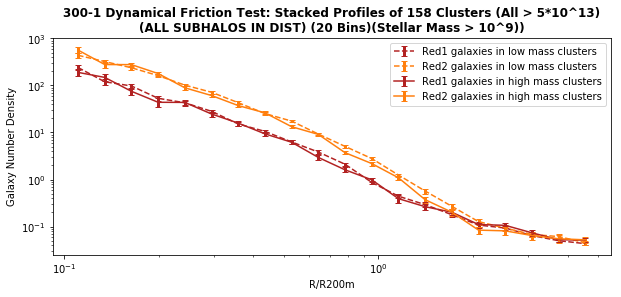

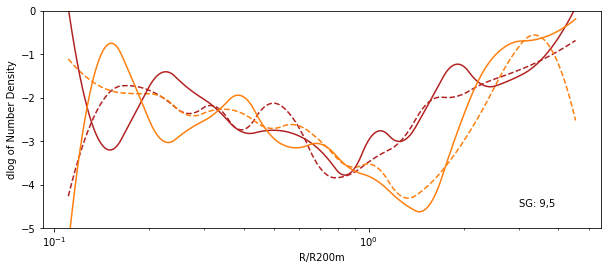

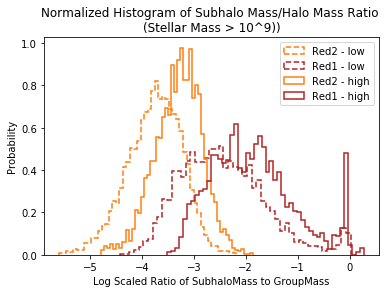

In [123]:
# CONTINUED PLOTTING of DYNAMICAL FRICTION PROFILES
w = 9
p = 5
dlog_data_SG_x1, dlog_data_SG_y1, yy_fine1, xx_fine1 = get_slope_sg(bin_stack11, (Yi_avg11), 1000,w,p)  
dlog_data_SG_x_b1, dlog_data_SG_y_b1, yy_fine_b1, xx_fine_b1 = get_slope_sg(bin_stack11, (Yi_avg_blue11), 1000,w,p)  
dlog_data_SG_x_r1, dlog_data_SG_y_r1, yy_fine_r1, xx_fine_r1 = get_slope_sg(bin_stack11, (Yi_avg_red11), 1000,w,p)  
dlog_data_SG_x_g1, dlog_data_SG_y_g1, yy_fine_g1, xx_fine_g1 = get_slope_sg(bin_stack11, (Yi_avg_green11), 1000,w,p)  

dlog_data_SG_x2, dlog_data_SG_y2, yy_fine2, xx_fine2 = get_slope_sg(bin_stack12, (Yi_avg12), 1000,w,p)  
dlog_data_SG_x_b2, dlog_data_SG_y_b2, yy_fine_b2, xx_fine_b2 = get_slope_sg(bin_stack12, (Yi_avg_blue12), 1000,w,p)  
dlog_data_SG_x_r2, dlog_data_SG_y_r2, yy_fine_r2, xx_fine_r2 = get_slope_sg(bin_stack12, (Yi_avg_red12), 1000,w,p)  
dlog_data_SG_x_g2, dlog_data_SG_y_g2, yy_fine_g2, xx_fine_g2 = get_slope_sg(bin_stack12, (Yi_avg_green12), 1000,w,p)  


# PLOTTING ALL
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack11, Yi_avg_red11, yerr = boot_err_red11, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in low mass clusters', ls='--')
plt.errorbar(bin_stack11, Yi_avg_green11, yerr = boot_err_green11, c='tab:orange', ecolor = 'tab:orange', elinewidth = 3, capsize=3, label = 'Red2 galaxies in low mass clusters', ls='--')
plt.errorbar(bin_stack12, Yi_avg_red12, yerr = boot_err_red12, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in high mass clusters')
plt.errorbar(bin_stack12, Yi_avg_green12, yerr = boot_err_green12, c='tab:orange', ecolor = 'tab:orange', elinewidth = 3, capsize=3, label = 'Red2 galaxies in high mass clusters')
#plt.plot(xx_fine_r1,yy_fine_r1, 'lightblue')
#plt.plot(xx_fine_g1,yy_fine_g1, 'lightblue')
#plt.plot(xx_fine_r2,yy_fine_r2, 'lightblue')
#plt.plot(xx_fine_g2,yy_fine_g2, 'lightblue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Dynamical Friction Test: Stacked Profiles of 158 Clusters (All > 5*10^13)\n(ALL SUBHALOS IN DIST) (%s Bins)(Stellar Mass > 10^%s))' %(bins, M), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick', ls='--')
plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'tab:orange',ls='--')
plt.plot(dlog_data_SG_x_r2, dlog_data_SG_y_r2, c = 'firebrick')
plt.plot(dlog_data_SG_x_g2, dlog_data_SG_y_g2, c = 'tab:orange')
plt.xscale('log')
plt.xlabel('R/R200m')
plt.ylabel('dlog of Number Density')
plt.text(3,-4.5,'SG: %s,%s'%(w,p))
plt.ylim(-5,0)

plt.figure()
plt.hist(np.log10(red2_ratio21), bins=50, label = 'Red2 - low', density=True, stacked=True, color='tab:orange', histtype='step',ls='dashed', lw = 1.5)
plt.hist(np.log10(red1_ratio21), bins=50, label = 'Red1 - low',density=True,stacked=True,color='firebrick', histtype='step',ls='dashed', lw = 1.5)
plt.hist(np.log10(red2_ratio22), bins=50, label = 'Red2 - high', density=True, stacked=True, color='tab:orange', histtype='step', lw = 1.5)
plt.hist(np.log10(red1_ratio22), bins=50, label = 'Red1 - high',density=True,stacked=True,color='firebrick', histtype='step', lw = 1.5)
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Probability')
plt.title('Normalized Histogram of Subhalo Mass/Halo Mass Ratio \n(Stellar Mass > 10^%s))' %(M))
plt.legend()

## Initial Dynamical Friction Histograms

6926 [0.836208164691925, 0.04715836048126221, 0.008932583965361118, 0.004133705981075764, 0.0015359623357653618, 0.0016187879955396056, 0.0017632900271564722, 0.0014121757121756673, 0.000726063852198422, 0.0015406700549647212]
11885 [0.00033688885741867125, 0.0002524737792555243, 0.00022726578754372895, 0.00020425437833182514, 0.000215161097003147, 0.0002672770933713764, 0.00022889897809363902, 0.0002085890300804749, 0.00017869757721200585, 0.00022504683875013143]
6658 11612
276.70343 126.50072
73129.44 4124.1694
73129.44 4124.1694
[1.0868904e+04 6.1980766e+04 0.0000000e+00 0.0000000e+00 2.7670343e+02
 3.0654702e+00] [3.1425165e+02 3.6823003e+03 0.0000000e+00 0.0000000e+00 1.2650072e+02
 1.1166244e+00]


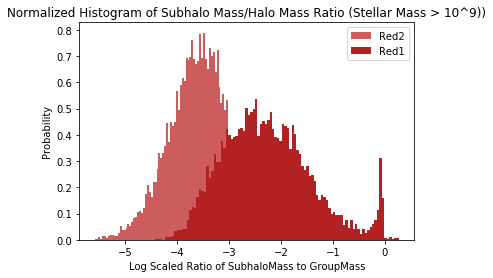

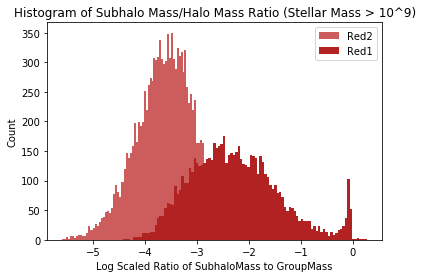

In [53]:
# Dynamical Friction Histograms

print(len(red1_ratio2), red1_ratio2[:10])
print(len(red2_ratio2), red2_ratio2[:10])
print(sum(number_red1), sum(number_red2))
print(subhalo_table['StellarMass'][0],subhalo_table['StellarMass'][1])
print(subhalo_table['SubhaloMass'][0],subhalo_table['SubhaloMass'][1])
print(subhalo_grp['SubhaloMass'][0],subhalo_grp['SubhaloMass'][1])
print(subhalo_grp['SubhaloMassType'][0],subhalo_grp['SubhaloMassType'][1])

plt.figure()
plt.hist(np.log10(red2_ratio2), bins=100, label = 'Red2', density=True, stacked=True, color='indianred')
plt.hist(np.log10(red1_ratio2), bins=100, label = 'Red1',density=True,stacked=True,color='firebrick')
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Probability')
plt.title('Normalized Histogram of Subhalo Mass/Halo Mass Ratio (Stellar Mass > 10^%s))' %(M))
plt.legend()

plt.figure()
plt.hist(np.log10(red2_ratio2), bins=100, label = 'Red2', density=False, stacked=True, color = 'indianred')
plt.hist(np.log10(red1_ratio2), bins=100, label = 'Red1',density=False,stacked=True, color='firebrick')
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Count')
plt.title('Histogram of Subhalo Mass/Halo Mass Ratio (Stellar Mass > 10^%s)' %(M))
plt.legend()


## Finding Nearby Halos

[3 1 3 0 0 0 1 1 1 0 0 0 1 0 1 2 1 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


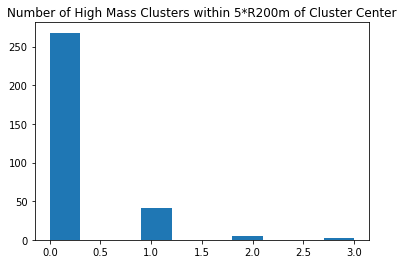

In [57]:
# Finding Nearby Halos

#print(len(subhalo_table_clean), len(subhalo_table_m))
#print(subhalo_table_clean['StellarMass'][1000:1050]*1e10)
#print(subhalo_table_m['StellarMass'][1000:1050]*1e10)
halos_nearby = []
for h_i in halo_array_masked[:]:
    CM_halo = halo_grp['GroupCM'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    #dev = np.array(CM_HALOS - CM_halo) #has all subhalos > mass cut
    N = 0
    for h_j in halo_array_masked[:]:
        if h_j != h_i:
            CM_halo_j = halo_grp['GroupCM'][h_j]
            R = np.linalg.norm(CM_halo_j-CM_halo)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
            #if h_i == 0:
                #print(R200m,R)
            if (R<=5*R200m):
                N += 1
    halos_nearby.append(N)
halos_nearby = np.array(halos_nearby)
print(halos_nearby)
plt.figure()
plt.hist(halos_nearby)
plt.title('Number of High Mass Clusters within 5*R200m of Cluster Center')
plt.show()




# Color Plots, Abundance Plots (2d and 1d histograms)

In [77]:
plt.rcParams['figure.facecolor'] = 'w'
import matplotlib.gridspec as gridspec

#BASIC CUTS APPLIED TO SUBHALOS
mag = basic_sub_cuts(subhalo_grp,'SubhaloStellarPhotometrics')
sfr = basic_sub_cuts(subhalo_grp,'SubhaloSFR')
# SUBHALO MASS MASKING
mass = basic_sub_cuts(subhalo_grp,'SubhaloMassType') #previously SubhaloMassInHalfRad (no type specification or index chosen)
mass2 = basic_sub_cuts(subhalo_grp,'SubhaloMassInHalfRad') 
print(np.shape(mass))
subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
subhalomass2 = np.array(np.log10(mass2*1e10/0.704))
#mask = ((subhalo_grp['SubhaloMassInHalfRad'][:,4]*1e10)>(10**9.5))
mask1 = subhalomass>9 #previouslt it was >9.5
mask2 = subhalomass2>9.5
#basic_cuts(subhalo_grp, 'Subhalo')
print("Subhalos with total halfradmass >9.5:",len(mag[mask2]))
print("Subhalos with stellar mass > 9:", len(mag[mask1]))
group_numbers = basic_sub_cuts(subhalo_grp,'SubhaloGrNr')
sub_pos = basic_sub_cuts(subhalo_grp, 'SubhaloCM')
mag = mag[mask1]
sfr = sfr[mask1]

# CLUSTER MASS MASKING
w = (group_numbers[mask1])
cluster_mass = []
for h_i in group_numbers[mask1]:
    cluster_mass.append(halo_grp["GroupMass"][h_i]*1e10/.704)
cluster_mass = np.array(cluster_mass)
cluster_mass_mask = (cluster_mass > (5*(10**13)))

(2292785, 6)


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Subhalos with total halfradmass >9.5: 912807
Subhalos with stellar mass > 9: 268208


In [75]:
# WITHIN 1 MPC MASKING (OPTIONAL)
chosen_subs_group_numbers = group_numbers[mask1][cluster_mass_mask]
dist_list = []
scale_factor = header['Time']
for i in range(len(chosen_subs_group_numbers)):
    h_i = chosen_subs_group_numbers[i]
    dev = (sub_pos[mask1][cluster_mass_mask])[i] - halo_grp['GroupCM'][h_i]
    dist = np.linalg.norm(dev)*.001*scale_factor/.704
    dist_list.append(dist)
dist_array = np.array(dist_list)
#print(dist_array)

dist_list2 = []
all_subs_group_numbers = group_numbers[mask1]
for i in range(len(all_subs_group_numbers)):
    h_i = all_subs_group_numbers[i]
    dev2 = (sub_pos[mask1])[i] - halo_grp['GroupCM'][h_i]
    dist2 = np.linalg.norm(dev2)*.001*scale_factor/.704
    dist_list2.append(dist2)
dist_array2 = np.array(dist_list2)

(2292785, 6)


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Subhalos with total halfradmass >9.5: 912807
Subhalos with stellar mass > 9: 268208


KeyboardInterrupt: 

In [143]:
#subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
metals = basic_sub_cuts(subhalo_grp,'SubhaloStarMetalFractions')[mask1]

H_abund = metals[:,0]
H_abund_cl = metals[:,0][cluster_mass_mask]
He_abund = metals[:,1]
He_abund_cl = metals[:,1][cluster_mass_mask]
C_abund = metals[:,2]
C_abund_cl = metals[:,2][cluster_mass_mask]
N_abund = metals[:,3]
N_abund_cl = metals[:,3][cluster_mass_mask]

stellar_mass = subhalomass[mask1]
stellar_mass_cl = stellar_mass[cluster_mass_mask]

sfr_cl = sfr[cluster_mass_mask]

#G-R, R-Z MAGNITUDE ARRAYS MASKED FOR SUBHALO SELECTION
mag1 = mag[cluster_mass_mask]
mag2 = mag1[dist_array <= 1.]
mag3 = mag1[dist_array > 1.]
mag4 = mag[dist_array2 > 2.]
#mag = mag[(group_numbers < 1154)&(mask)]
g_minus_r = mag[:,4]-mag[:,5]
r_minus_z = mag[:,5]-mag[:,7]
g_minus_i = mag[:,4]-mag[:,6]
r_band = mag[:,5]
i_band = mag[:,6]
g_minus_r_cl = mag1[:,4]-mag1[:,5]
r_minus_z_cl = mag1[:,5]-mag1[:,7]
g_minus_i_cl = mag1[:,4]-mag1[:,6]
r_band_cl = mag1[:,5]
i_band_cl = mag1[:,6]
g_minus_r_cl2 = mag2[:,4]-mag2[:,5]
r_minus_z_cl2 = mag2[:,5]-mag2[:,7]
r_band_cl2 = mag2[:,5]
g_minus_r_f = mag3[:,4]-mag3[:,5]
r_minus_z_f = mag3[:,5]-mag3[:,7]
g_minus_r_f2 = mag4[:,4]-mag4[:,5]
r_minus_z_f2 = mag4[:,5]-mag4[:,7]
print("mag lengths:",len(mag), len(mag1), len(mag2), len(mag3), len(mag4))
#print(group_numbers[mask][-100:])
#print(w[-1000:])
#print(cluster_mass)
    
# COLOR-CUTS
b1 = .25
b2 = .59
r1 = .61
r2 = .73

mag lengths: 268208 24706 19298 5408 810


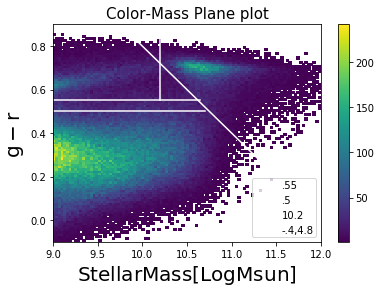

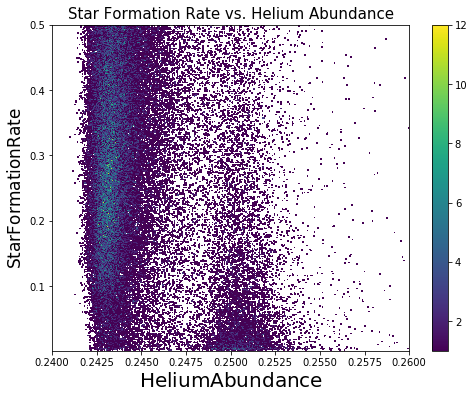

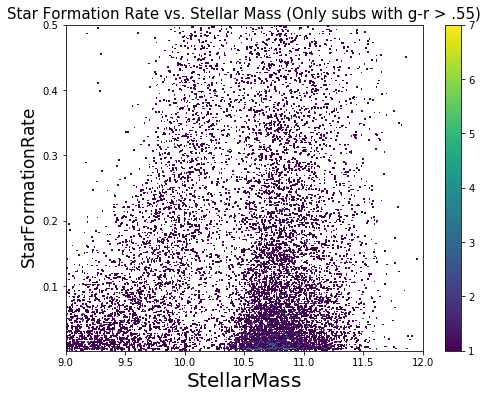

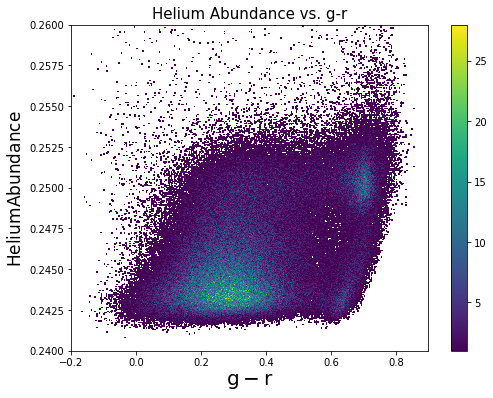

In [170]:
# COLOR-MASS PLOT
# RANGE OPTIONS
#range_hist = [[0, 0.8], [0, 0.8]] #old
range_hist = [[-.2, .9], [-.2, .8]]
#range_hist = [[.5, 0.9], [.2, 0.8]]

gmr = g_minus_r_cl
rmz = r_minus_z_cl

'''
# NUMPY HISTOGRAM WITH IMSHOW FOR OVERDENSITY PLOTS
fig1 = plt.figure(figsize = (20,15))
gs1 = gridspec.GridSpec(10,12)
ax1 = plt.subplot(gs1[3:8, 5:10])  
ax1.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax1.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
ax1.set_title("300-1 Overdensity Color-Color plot \n (Inside 2 Mpc of selected, outside 2 Mpc of all)", fontsize = 15) #   (Subhalos in Selected Clusters)

#h, x, y = np.histogram2d(g_minus_r, r_minus_z, bins = 50, range=range_hist)
h_f, x_f, y_f = np.histogram2d(g_minus_r_f2, r_minus_z_f2, bins = 50, range=range_hist, weights = None)
#h_ND = h/(.007*.008)
#avg = np.mean(h)
avg = np.average(h_f, weights = (h_f > 0))
h_cl2, x_cl2, y_cl2 = np.histogram2d(g_minus_r_cl2, r_minus_z_cl2, bins = 50, range=range_hist, weights = None)
#h_ND_cl = h_cl/(.007*.008)
print(avg)
overdens = np.zeros(np.shape(h_cl2.T))
for i in range(len(h_cl2.T[:,0])):
    for j in range(len(h_cl2.T[0,:])):
        if h_cl2.T[i,j] == 0:
            overdens[i,j] = 0
        else:
            overdens[i,j] = (h_cl2.T[i,j]/len(g_minus_r_cl2)) - (avg/len(g_minus_r_f2)) #/len(g_minus_r_f) #
#overdens = h_cl2.T - avg
print(len(g_minus_r_cl2), len(g_minus_r_f2))
H2 = ax1.imshow(overdens, origin='lower', extent=[-.2, 0.9,-.2, 0.8], cmap = 'coolwarm')
fig1.colorbar(H2, ax=ax1)
'''
'''
# COLOR-COLOR PLOT SPECIFICATIONS (CHANGE DEPENDING ON WHETHER 1D HIST INCLUDED OR NOT)
fig = plt.figure(figsize = (20,15))
gs = gridspec.GridSpec(10,12)
ax0 = plt.subplot(gs[3:8, 5:10])  
axx = plt.subplot(gs[8:10, 5:10], sharex=ax0)  ##
axx.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax0.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
if np.shape(gmr) == np.shape(g_minus_r):
    ax0.set_title("300-1 Color-Color plot", fontsize = 15) #   (Subhalos in Selected Clusters)
elif np.shape(gmr) == np.shape(g_minus_r_cl):
    ax0.set_title("300-1 Color-Color plot (Subhalos in Selected Clusters)", fontsize = 15) #   
elif np.shape(gmr) == np.shape(g_minus_r_cl2):
    ax0.set_title("300-1 Color-Color plot (Subhalos within 1 Mpc of Selected Clusters)", fontsize = 15) #   

#ax0.plot([b1,b1],np.linspace(0,0.8,2), c = 'b', label = b1, linewidth=1) #left blue bound
#ax0.plot([b2,b2],np.linspace(0,0.8,2), c = 'b', label = b2, linewidth=1)
#ax0.plot([r1,r1],np.linspace(0,0.8,2), c = 'r', label = r1, linewidth=1)
#ax0.plot([r2,r2],np.linspace(0,0.8,2), c = 'r', label = r2, linewidth=1)
ax0.legend()
fig.tight_layout()

# 2D AND 1D MATPLOTLIB HISTOGRAMS
h_cl, x_cl, y_cl = np.histogram2d(gmr, rmz, bins = 100, range=range_hist)
H = ax0.hist2d(gmr, rmz , bins = 200, cmap='viridis', range=range_hist, weights=None, cmin = .1, cmax = None)#range=[[0.4, 0.7], [0.5, 0.8]])
h_cl200, x_cl200, y_cl200 = np.histogram2d(gmr, rmz, bins = 200, range=range_hist)
 
#H = ax0.imshow(h_cl200.T, origin='lower', extent=[0, 0.8,0, 0.8], cmap = 'viridis')
#ax0.contour(H[0].T, extent = [H[1][0], H[1][-1], H[2][0], H[2][-1]], linewidths=3, cmap = 'viridis') #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
level_list = [2,30,60,99,100]#[1,15,30,49]
ax0.contour(h_cl.T, extent = [x_cl[0], x_cl[-1], y_cl[0], y_cl[-1]], linewidths=1, cmap = 'autumn', levels = level_list) #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
axx.hist(gmr, bins = H[1], range = [-.2,0.9])
plt.show()
#[1,15,30,49] extent = [x_cl[0], x_cl[-1], y_cl[0], y_cl[-1]]
#fig.colorbar(H[3], ax=ax0)
'''

# COLOR-MASS PLOT
plt.figure()
plt.hist2d(stellar_mass, g_minus_r, bins = 100, cmap = 'viridis', range=[[9, 12], [-.1, .9]], cmin=.01)
#plt.scatter(stellar_mass, g_minus_r)
plt.plot([9,10.65], [.55,.55], c = 'w', label='.55')
plt.plot([9,10.7], [.50,.50], c = 'w', label='.5')
plt.plot([10.2,10.2], [.55,.9], c = 'w', label='10.2')
#plt.plot([9.75,11.5],[.9,.2], c = 'w', label='[9.75,11.5],\n[.9,.2]')
x = np.array([9.,10.,12.])
plt.plot(x,(-.4*x)+4.8, c='w', label='-.4,4.8')
#plt.plot(stellar_mass, (stellar_mass*0.054)+.05, c = 'w')
#plt.colorbar()
plt.xlabel("$\mathrm{Stellar Mass [Log Msun]}$", fontsize = 20)
plt.ylabel("$\mathrm{g-r}$", fontsize = 20)
plt.title("Color-Mass Plane plot", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
plt.legend(loc='lower right', borderpad=.2)

'''
# COLOR-MAGNITUDE PLOT
plt.figure()
plt.hist2d(i_band_cl, mag1[:,5]-mag1[:,6], bins = 100, cmap = 'viridis', cmin=.01)
plt.xlabel("$\mathrm{i}$", fontsize = 20)
plt.ylabel("$\mathrm{r-i}$", fontsize = 20)
plt.title("Color-Magnitude Plot (subs in selected clusters)", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
'''

# STAR FORMATION PLOT
plt.figure(figsize=(8,6))#12,6?
plt.hist2d(He_abund, sfr, bins=500, cmap='viridis', cmin=.01, range=[[.24,.26], [0.001,.5]])
plt.xlabel("$\mathrm{Helium Abundance}$", fontsize = 20)
plt.ylabel("$\mathrm{Star Formation Rate}$", fontsize = 17)
plt.title("Star Formation Rate vs. Helium Abundance", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# STAR FORMATION PLOT
plt.figure(figsize=(8,6))
plt.hist2d(stellar_mass[g_minus_r > .55], sfr[g_minus_r > .55], bins=500, cmap='viridis', cmin=.01, range=[[9,12], [0.001,.5]])
plt.xlabel("$\mathrm{Stellar Mass}$", fontsize = 20)
plt.ylabel("$\mathrm{Star Formation Rate}$", fontsize = 17)
plt.title("Star Formation Rate vs. Stellar Mass (Only subs with g-r > .55)", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# STAR FORMATION PLOT
plt.figure(figsize=(8,6))
plt.hist2d(g_minus_r, He_abund, bins=500, cmap='viridis', cmin=.01, range=[[-.2,.9], [0.24,.26]])
plt.xlabel("$\mathrm{g-r}$", fontsize = 20)
plt.ylabel("$\mathrm{Helium Abundance}$", fontsize = 17)
plt.title("Helium Abundance vs. g-r", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# (subs in selected clusters)

## Color Splitting Profiles (OLD)

Number of halos with mass > 10^14 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

N Subhalos after total masking: 121
len of all, blue, red: 121 21 30 70
R500c, R200c, R200m: 0.5770362450325272 0.8675239024200502 1.07320081643798
galaxies [4, 3, 5, 3, 6, 7, 8, 15, 13, 11, 13, 21, 6, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 3, 5, 1, 2, 6, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 1, 1, 2, 3, 4, 2, 1, 2, 5, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [3, 1, 4, 2, 4, 4, 4, 8, 6, 9, 9, 10, 4, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 115

Halo: 13
Halo Mass: 27343.611
N Subhalos: 1930
N Subhalos after first masking: 1884
N Subhalos after total masking: 137
len of all, blue, red: 137 54 30 53
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
galaxies [0, 1, 0, 0, 2, 1, 2, 8, 14, 24, 31, 24, 16, 6, 5, 1, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 1, 1, 2, 2, 4, 5, 10, 11, 8, 3, 4, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 8, 5, 2, 2, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0

N Subhalos after first masking: 1496
N Subhalos after total masking: 88
len of all, blue, red: 88 17 18 53
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
galaxies [1, 1, 4, 3, 8, 7, 3, 9, 10, 15, 11, 11, 3, 0, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 6, 1, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 1, 1, 4, 2, 0, 0, 2, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 3, 2, 3, 5, 3, 7, 6, 11, 6, 5, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 87

Halo: 28
Halo Mass: 18303.37
N Subhalos: 1259
N Subhalos after first masking: 1246
N Subhalos after total masking: 88
len of all, blue, red: 88 18 21 49
R500c, R200c, R200m: 0.47005714481822525 0.7368807582565953 0.9160478994506897
galaxies [0, 1, 2, 3, 4, 0, 6, 8, 10, 16, 16, 10, 4, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 3, 2, 1, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 0, 2, 1, 2, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]


N Subhalos after first masking: 1201
N Subhalos after total masking: 85
len of all, blue, red: 85 25 21 39
R500c, R200c, R200m: 0.40733048577313546 0.6504043815363484 0.8165077607895266
galaxies [0, 0, 1, 2, 3, 10, 9, 6, 6, 13, 9, 6, 9, 7, 1, 3, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 3, 3, 0, 0, 4, 2, 2, 5, 3, 0, 2, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 3, 1, 5, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 6, 5, 3, 5, 4, 6, 0, 4, 1, 1, 1, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 43
Halo Mass: 15200.831
N Subhalos: 1214
N Subhalos after first masking: 1206
N Subhalos after total masking: 86
len of all, blue, red: 86 22 15 49
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
galaxies [0, 3, 2, 5, 2, 8, 17, 10, 5, 9, 10, 8, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 7, 3, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 1, 1, 0, 6, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red g

N Subhalos after first masking: 858
N Subhalos after total masking: 74
len of all, blue, red: 74 17 15 42
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
galaxies [2, 0, 3, 3, 6, 7, 2, 7, 8, 3, 7, 6, 8, 3, 3, 1, 2, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 5, 0, 2, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 3, 3, 4, 5, 1, 5, 5, 2, 0, 4, 5, 2, 0, 1, 0, 0, 0, 0]
sum of galaxies: 71

Halo: 58
Halo Mass: 13182.956
N Subhalos: 965
N Subhalos after first masking: 956
N Subhalos after total masking: 88
len of all, blue, red: 88 22 12 54
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
galaxies [0, 0, 0, 0, 0, 0, 1, 5, 10, 19, 14, 8, 16, 9, 5, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 2, 7, 4, 1, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 4, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 728
N Subhalos after total masking: 46
len of all, blue, red: 46 8 8 30
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
galaxies [1, 2, 1, 3, 5, 2, 2, 7, 7, 5, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 3, 3, 2, 1, 5, 2, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 41

Halo: 73
Halo Mass: 11412.425
N Subhalos: 955
N Subhalos after first masking: 940
N Subhalos after total masking: 55
len of all, blue, red: 55 19 14 22
R500c, R200c, R200m: 0.38442537491924356 0.5967422829436472 0.7624553262956387
galaxies [1, 2, 3, 1, 3, 3, 2, 3, 5, 3, 9, 9, 6, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 5, 2, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0]
red galaxies 

N Subhalos after first masking: 847
N Subhalos after total masking: 62
len of all, blue, red: 62 14 14 34
R500c, R200c, R200m: 0.3733695408884831 0.5914074120529359 0.7435145469231016
galaxies [1, 1, 2, 1, 1, 5, 3, 6, 3, 9, 10, 6, 7, 6, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 6, 1, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 3, 1, 3, 3, 6, 3, 5, 4, 4, 0, 0, 0, 0, 0, 0]
sum of galaxies: 61

Halo: 88
Halo Mass: 10377.713
N Subhalos: 915
N Subhalos after first masking: 904
N Subhalos after total masking: 54
len of all, blue, red: 54 15 16 23
R500c, R200c, R200m: 0.36927057354705745 0.5933709417564849 0.7523559153089142
galaxies [1, 0, 2, 0, 2, 3, 1, 1, 6, 6, 13, 3, 5, 3, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 767
N Subhalos after total masking: 47
len of all, blue, red: 47 24 8 15
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
galaxies [1, 0, 0, 0, 2, 4, 8, 3, 5, 6, 5, 4, 3, 4, 2, 0, 0, 0, 0, 0]
blue galaxies counted [1, 0, 0, 0, 2, 2, 2, 0, 3, 5, 4, 0, 2, 1, 2, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 3, 0, 0, 0, 0, 0, 0]
sum of galaxies: 47

Halo: 103
Halo Mass: 9901.212
N Subhalos: 770
N Subhalos after first masking: 763
N Subhalos after total masking: 55
len of all, blue, red: 55 18 16 21
R500c, R200c, R200m: 0.3732443131244922 0.569281451692264 0.7165775264338853
galaxies [1, 1, 2, 3, 2, 4, 3, 4, 3, 3, 2, 7, 9, 6, 4, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 3, 2, 2, 2, 1, 0, 0, 0, 0]
red galaxies counted [1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 3, 2, 1, 0, 0, 0, 0, 0]
red galaxies cou

N Subhalos after first masking: 687
N Subhalos after total masking: 56
len of all, blue, red: 56 26 9 21
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
galaxies [3, 3, 3, 2, 1, 2, 5, 10, 3, 4, 7, 5, 4, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [1, 0, 1, 0, 0, 1, 0, 4, 2, 3, 4, 5, 3, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 2, 1, 0, 5, 3, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 53

Halo: 118
Halo Mass: 9247.675
N Subhalos: 803
N Subhalos after first masking: 783
N Subhalos after total masking: 64
len of all, blue, red: 64 30 10 24
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
galaxies [0, 1, 0, 0, 5, 4, 3, 4, 3, 3, 10, 3, 16, 9, 3, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 5, 2, 10, 4, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 659
N Subhalos after total masking: 41
len of all, blue, red: 41 9 6 26
R500c, R200c, R200m: 0.3534979605208085 0.5626716036276971 0.7080698051660715
galaxies [1, 2, 1, 5, 0, 1, 3, 3, 7, 3, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 5, 0, 1, 3, 2, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 38

Halo: 133
Halo Mass: 8327.565
N Subhalos: 503
N Subhalos after first masking: 495
N Subhalos after total masking: 41
len of all, blue, red: 41 6 7 28
R500c, R200c, R200m: 0.37210877594487585 0.5734904737405987 0.7015678099135865
galaxies [0, 2, 2, 2, 2, 1, 2, 4, 6, 7, 3, 1, 4, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies cou

N Subhalos after first masking: 729
N Subhalos after total masking: 45
len of all, blue, red: 45 23 11 11
R500c, R200c, R200m: 0.23316514885129877 0.42072341097349336 0.573966443333338
galaxies [0, 0, 0, 0, 0, 1, 4, 1, 3, 7, 9, 5, 5, 9, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 3, 5, 3, 5, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 5, 0, 1, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 45

Halo: 148
Halo Mass: 8410.298
N Subhalos: 755
N Subhalos after first masking: 745
N Subhalos after total masking: 39
len of all, blue, red: 39 12 11 16
R500c, R200c, R200m: 0.3365799218054465 0.5395676416536827 0.6763263285102222
galaxies [0, 1, 0, 0, 0, 2, 6, 9, 4, 1, 5, 6, 2, 1, 0, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
red galaxies

N Subhalos after first masking: 651
N Subhalos after total masking: 43
len of all, blue, red: 43 13 11 19
R500c, R200c, R200m: 0.2918016080998203 0.5420416106126296 0.6729753648588245
galaxies [0, 1, 0, 2, 2, 3, 4, 7, 6, 7, 3, 4, 2, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 3, 4, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 2, 3, 2, 5, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 43

Halo: 163
Halo Mass: 7904.2363
N Subhalos: 617
N Subhalos after first masking: 602
N Subhalos after total masking: 43
len of all, blue, red: 43 17 8 18
R500c, R200c, R200m: 0.36695089736382064 0.559705210916484 0.6892209448939575
galaxies [1, 0, 0, 1, 8, 5, 6, 3, 5, 3, 6, 2, 0, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 2, 3, 3, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies 

N Subhalos after first masking: 815
N Subhalos after total masking: 40
len of all, blue, red: 40 18 10 12
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
galaxies [0, 1, 0, 0, 0, 1, 2, 2, 0, 4, 4, 4, 3, 2, 3, 9, 2, 1, 2, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 5, 2, 1, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 3, 0, 0, 2, 0]
red galaxies counted [0, 1, 0, 0, 0, 0, 2, 0, 0, 3, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 40

Halo: 178
Halo Mass: 7203.893
N Subhalos: 573
N Subhalos after first masking: 565
N Subhalos after total masking: 39
len of all, blue, red: 39 15 5 19
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
galaxies [1, 0, 2, 0, 4, 3, 2, 5, 6, 6, 2, 0, 4, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 2, 1, 3, 1, 0, 4, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies

N Subhalos after first masking: 501
N Subhalos after total masking: 32
len of all, blue, red: 32 4 8 20
R500c, R200c, R200m: 0.3320443787714628 0.5399835996037677 0.6750545140580275
galaxies [0, 1, 2, 0, 1, 1, 2, 3, 10, 4, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 2, 0, 0, 1, 2, 2, 6, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 31

Halo: 193
Halo Mass: 7080.1284
N Subhalos: 633
N Subhalos after first masking: 619
N Subhalos after total masking: 39
len of all, blue, red: 39 15 6 18
R500c, R200c, R200m: 0.28340394153891557 0.43412106023911684 0.5369897032244402
galaxies [0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 7, 2, 4, 2, 5, 7, 5, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 3, 6, 1, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
red galaxies


Halo: 207
Halo Mass: 6543.4116
N Subhalos: 488
N Subhalos after first masking: 478
N Subhalos after total masking: 30
len of all, blue, red: 30 7 9 14
R500c, R200c, R200m: 0.3270789257810798 0.5212522004120723 0.6502222247824612
galaxies [2, 3, 0, 3, 1, 2, 0, 2, 4, 5, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 3, 0, 1, 1, 2, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 28

Halo: 208
Halo Mass: 6570.345
N Subhalos: 476
N Subhalos after first masking: 471
N Subhalos after total masking: 29
len of all, blue, red: 29 12 5 12
R500c, R200c, R200m: 0.3649271958798118 0.5410014755307084 0.6619903117381459
galaxies [1, 0, 1, 2, 4, 0, 2, 3, 0, 7, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 2, 1, 0, 1, 2, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 1, 0, 1, 0, 0, 0, 0, 0

N Subhalos after first masking: 427
N Subhalos after total masking: 37
len of all, blue, red: 37 9 8 20
R500c, R200c, R200m: 0.33810691585088887 0.5101105725519537 0.6332734396084211
galaxies [0, 2, 2, 4, 1, 0, 5, 3, 4, 3, 4, 3, 3, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 2, 2, 4, 0, 0, 3, 1, 2, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 36

Halo: 223
Halo Mass: 6099.7847
N Subhalos: 524
N Subhalos after first masking: 512
N Subhalos after total masking: 28
len of all, blue, red: 28 15 5 8
R500c, R200c, R200m: 0.29669597992173596 0.4929715036303915 0.6178435214861884
galaxies [1, 1, 1, 1, 0, 1, 1, 4, 3, 7, 4, 1, 3, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 3, 3, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies c

len of all, blue, red: 31 7 7 17
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
galaxies [0, 1, 1, 1, 2, 1, 3, 2, 2, 4, 4, 3, 5, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 29

Halo: 238
Halo Mass: 6075.759
N Subhalos: 483
N Subhalos after first masking: 478
N Subhalos after total masking: 28
len of all, blue, red: 28 10 5 13
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
galaxies [0, 0, 1, 1, 2, 4, 2, 2, 2, 4, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 3, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum 

N Subhalos after first masking: 390
N Subhalos after total masking: 23
len of all, blue, red: 23 3 4 16
R500c, R200c, R200m: 0.32492627332909946 0.5057477381413258 0.6250326280281163
galaxies [2, 2, 2, 2, 0, 2, 2, 0, 5, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 21

Halo: 253
Halo Mass: 5553.335
N Subhalos: 329
N Subhalos after first masking: 316
N Subhalos after total masking: 33
len of all, blue, red: 33 6 7 20
R500c, R200c, R200m: 0.3330540476358657 0.5097209172364409 0.6290327503090262
galaxies [0, 2, 1, 1, 2, 1, 2, 4, 8, 4, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies cou

len of all, blue, red: 27 15 7 5
R500c, R200c, R200m: 0.2880012977658667 0.46117582204991164 0.5695267027415635
galaxies [0, 1, 0, 1, 1, 0, 3, 2, 4, 5, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 2, 0, 2, 4, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 27

Halo: 268
Halo Mass: 5499.5674
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking: 33
len of all, blue, red: 33 9 11 13
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
galaxies [0, 0, 1, 3, 1, 2, 1, 2, 5, 6, 3, 5, 1, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 2, 1, 2, 0, 1, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
su

len of all, blue, red: 24 3 7 14
R500c, R200c, R200m: 0.30190490242833096 0.47583920053111656 0.5949590283747693
galaxies [1, 1, 0, 0, 2, 3, 2, 4, 4, 1, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 2, 2, 1, 2, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 24

Halo: 283
Halo Mass: 5127.922
N Subhalos: 363
N Subhalos after first masking: 358
N Subhalos after total masking: 16
len of all, blue, red: 16 4 3 9
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
galaxies [1, 1, 0, 1, 3, 3, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum

len of all, blue, red: 30 16 8 6
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
galaxies [0, 0, 0, 0, 2, 0, 5, 3, 3, 3, 2, 1, 4, 6, 0, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 0, 2, 3, 1, 0, 3, 3, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 30

Halo: 298
Halo Mass: 5065.933
N Subhalos: 387
N Subhalos after first masking: 376
N Subhalos after total masking: 27
len of all, blue, red: 27 7 7 13
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
galaxies [0, 0, 0, 1, 0, 2, 3, 3, 1, 3, 6, 4, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
sum 

N Subhalos after first masking: 474
N Subhalos after total masking: 26
len of all, blue, red: 26 10 6 10
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
galaxies [0, 1, 1, 1, 0, 4, 1, 0, 0, 5, 2, 6, 0, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 1, 0, 3, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 24

Halo: 320
Halo Mass: 5094.6997
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking: 28
len of all, blue, red: 28 10 8 10
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
galaxies [0, 0, 0, 0, 0, 0, 1, 0, 4, 4, 1, 3, 7, 5, 3, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 4, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0]
red galaxie

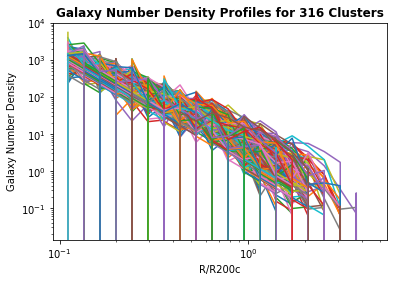

R_avg: 0.6982244391252947
Rmax_list: [1.3280076, 1.711756, 1.5610569, 1.6879034, 2.1744728, 1.6084954, 1.6712394, 1.8458252, 1.2041478, 1.5363575, 1.6136098, 1.4473686, 1.2585247, 2.0040758, 1.4508549, 1.1486049, 2.2576675, 2.903064, 1.85229, 1.8103445, 1.0514941, 3.1170206, 2.1657348, 1.780066, 2.2047398, 1.2322907, 1.3333524, 1.7034097, 1.3237178, 2.2414794, 1.2003801, 2.1937907, 1.0524186, 2.7535207, 3.5576003, 2.312443, 2.1586478, 1.6497698, 1.4909953, 2.0866988, 1.3502595, 1.699537, 2.0972915, 1.0684441, 1.4308753, 1.4059935, 1.5951569, 1.7059721, 1.0667516, 1.9059974, 1.4038466, 2.0995173, 1.389817, 1.9110792, 1.3321853, 1.3032626, 1.3270646, 2.4328506, 1.9011108, 2.6588788, 1.9845538, 1.256914, 1.4655832, 2.8205116, 2.1419508, 1.4667588, 1.5191082, 2.281196, 2.9330354, 1.3570163, 1.7665392, 1.3859499, 1.1245502, 1.4906052, 1.7301228, 1.3214043, 0.8069425, 1.618137, 2.3211062, 1.487538, 1.0555279, 2.1285527, 1.7142245, 1.4286313, 2.511805, 2.528558, 0.9392687, 1.4744961, 1.614008

/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, 'dlog of Number Density')

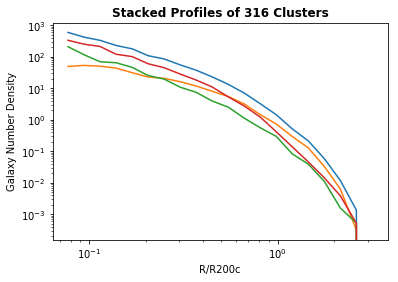

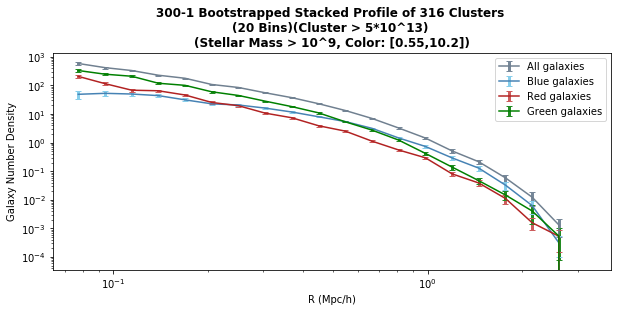

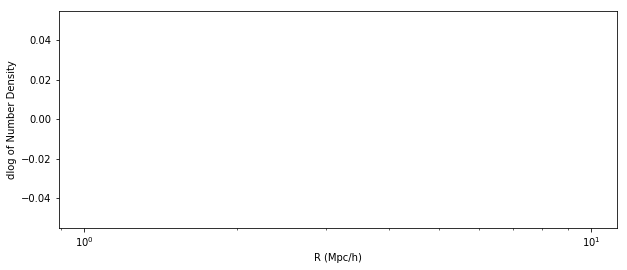

In [32]:
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

bins = 20#30#15
Rmin = .1
Rmax = 5#3#5.5 # for R200c#7

NDensity_list = []
NDensity_list_b = []
NDensity_list_r = []
NDensity_list_g = []
ND_boot = []
ND_boot_b = []
ND_boot_r = []
ND_boot_g = []
RScale_list = []
Rmax_list = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]

mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after first masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    mask_total = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > (10**9))
    print("N Subhalos after total masking:", len(subhalo_grp['SubhaloGrNr'][mask_total]))
    
    # COLOR CUTS
    mag = subhalo_grp['SubhaloStellarPhotometrics'][mask_total]
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalomass[mask_total])
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask_total]
    CM_halo = halo_grp['GroupCM'][h_i]
    
    print("len of all, blue, red:", len(CM_coords), len(CM_coords[blue_mask_subs]), len(CM_coords[red_mask_subs]), len(CM_coords[green_mask_subs]))

    # MAKING PROFILE
    #r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    redshift = header['Redshift']
    #H = cosmo.H(redshift)
    #conv_fac = 100/(H.value*1000)
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = CM_coords-CM_halo
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    Rmax_list.append(max(r_subhalo/RScale))

    NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(Rmin,Rmax,bins,r_subhalo,blue_mask_subs,red_mask_subs,green_mask_subs)    


    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)

        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_b.append(NDensity_blue)
    NDensity_list_r.append(NDensity_red)
    NDensity_list_g.append(NDensity_green)

    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')
plt.show()

# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack = R_avg*(bin_divided[1:]+bin_divided[:-1])/2
print("Rmax_list:", Rmax_list)
# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_b = np.mean(NDensity_list_b, axis=0)
NDensity_stack_r = np.mean(NDensity_list_r, axis=0)
NDensity_stack_g = np.mean(NDensity_list_g, axis=0)
plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.plot(bin_stack, NDensity_stack_b, '-')
plt.plot(bin_stack, NDensity_stack_r, '-')
plt.plot(bin_stack, NDensity_stack_g, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green, cov_green, boot_err_green = Bootstrap_Covariance(NDensity_list_g, 300, bins)
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack, (Yi_avg_green), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack, Yi_avg_red, yerr = boot_err_red, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Stellar Mass > 10^9, Color: %s)' %(Number_of_halos, bins, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))
plt.show()


In [33]:
# CONTINUED PLOTTING OF COLOR SPLIT PROFILES

#Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
#Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
#Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
z = -3
bin_stack = bin_stack
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack[:z], (Yi_avg)[:z], 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack[:z], (Yi_avg_blue)[:z], 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack[:z], (Yi_avg_red[:z]), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack[:z], (Yi_avg_green[:z]), 1000)  

#print(Yi_avg_red)
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(12,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack[:z], Yi_avg_red[:z], yerr = boot_err_red[:z], c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
#plt.plot(xx_fine, yy_fine, c = 'orange')
#plt.plot(xx_fine_b, yy_fine_b, c = 'orange')
#plt.plot(xx_fine_r, yy_fine_r, c = 'orange')
#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(.05,1.4)
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Stellar Mass > 10^9, Color: %s)' %(Number_of_halos, bins, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
#dlog_data_SG_x, dlog_data_SG_y = get_slope_sg(bin_stack, (Yi_avg), 1000)  
#dlog_data_SG_x_b, dlog_data_SG_y_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
#dlog_data_SG_x_r, dlog_data_SG_y_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000)  
plt.figure(figsize = (12,4))#(6,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.ylim(-6.5,4)
#plt.xlim(.6,1.2)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))


#print(len(r_subhalo),len(r_subhalo[blue_mask_subs]), len(r_subhalo[red_mask_subs]))


NameError: name 'Yi_avg_blue' is not defined

## Mass Split profiles

Number of halos with mass > 10^14 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

N Subhalos after first masking: 1909
N Subhalos after total masking (> 10^8): 248
R500c, R200c, R200m: 0.5770362450325272 0.8675239024200502 1.07320081643798
galaxies [6, 5, 9, 5, 25, 25, 30, 30, 32, 44, 27, 4, 0, 0, 0]
mass1 galaxies counted [2, 1, 3, 2, 15, 17, 12, 16, 20, 22, 15, 2, 0, 0, 0]
mass2 galaxies counted [2, 2, 4, 1, 7, 5, 10, 9, 9, 13, 9, 2, 0, 0, 0]
mass3 galaxies counted [2, 2, 1, 2, 3, 2, 8, 5, 3, 9, 3, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 242

Halo: 13
Halo Mass: 27343.611
N Subhalos: 1930
N Subhalos after first masking: 1884
N Subhalos after total masking (> 10^8): 303
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
galaxies [3, 0, 0, 2, 5, 6, 22, 46, 57, 63, 48, 28, 15, 2, 0]
mass1 galaxies counted [2, 0, 0, 2, 2, 4, 11, 26, 30, 31, 23, 22, 8, 1, 0]
mass2 galaxies counted [1, 0, 0, 0, 2, 2, 9, 10, 14, 17, 13, 5, 3, 1, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 0, 1, 10, 12, 14, 

N Subhalos after first masking: 1496
N Subhalos after total masking (> 10^8): 189
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
galaxies [3, 2, 6, 12, 17, 19, 20, 21, 40, 27, 11, 7, 3, 0, 0]
mass1 galaxies counted [1, 1, 1, 6, 8, 15, 11, 7, 21, 16, 6, 6, 2, 0, 0]
mass2 galaxies counted [1, 1, 3, 2, 6, 4, 7, 10, 17, 7, 4, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 2, 4, 3, 0, 2, 3, 1, 4, 1, 1, 1, 0, 0]
mass4 galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 188

Halo: 28
Halo Mass: 18303.37
N Subhalos: 1259
N Subhalos after first masking: 1246
N Subhalos after total masking (> 10^8): 162
R500c, R200c, R200m: 0.47005714481822525 0.7368807582565953 0.9160478994506897
galaxies [1, 4, 4, 14, 5, 13, 14, 23, 23, 34, 14, 4, 0, 0, 0]
mass1 galaxies counted [0, 3, 3, 8, 4, 7, 5, 10, 6, 17, 7, 1, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 2, 1, 2, 8, 7, 8, 12, 4, 3, 0, 0, 0]
mass3 galaxies counted [0, 1, 1, 4, 0, 3, 1, 6, 7, 5, 3, 0, 0,

N Subhalos after first masking: 1201
N Subhalos after total masking (> 10^8): 176
R500c, R200c, R200m: 0.40733048577313546 0.6504043815363484 0.8165077607895266
galaxies [0, 1, 2, 7, 13, 19, 13, 21, 28, 25, 16, 21, 5, 4, 1]
mass1 galaxies counted [0, 0, 2, 2, 5, 9, 5, 13, 15, 15, 9, 10, 3, 2, 1]
mass2 galaxies counted [0, 1, 0, 2, 5, 7, 5, 6, 6, 4, 5, 6, 2, 2, 0]
mass3 galaxies counted [0, 0, 0, 2, 3, 3, 3, 2, 6, 6, 2, 4, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
sum of galaxies: 176

Halo: 43
Halo Mass: 15200.831
N Subhalos: 1214
N Subhalos after first masking: 1206
N Subhalos after total masking (> 10^8): 163
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
galaxies [1, 5, 8, 6, 12, 28, 18, 28, 17, 26, 7, 1, 0, 0, 0]
mass1 galaxies counted [1, 2, 2, 3, 6, 10, 7, 20, 8, 14, 3, 1, 0, 0, 0]
mass2 galaxies counted [0, 2, 2, 2, 5, 8, 9, 5, 6, 6, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 4, 1, 1, 7, 2, 3, 3, 6, 2, 0, 0, 0, 

N Subhalos after first masking: 858
N Subhalos after total masking (> 10^8): 144
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
galaxies [6, 3, 5, 7, 15, 12, 13, 19, 9, 17, 15, 11, 6, 2, 1]
mass1 galaxies counted [4, 1, 2, 4, 6, 8, 5, 10, 6, 7, 7, 7, 3, 0, 0]
mass2 galaxies counted [1, 2, 1, 3, 5, 2, 5, 8, 1, 3, 4, 4, 2, 2, 0]
mass3 galaxies counted [1, 0, 2, 0, 3, 2, 3, 1, 2, 7, 3, 0, 0, 0, 1]
mass4 galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
sum of galaxies: 141

Halo: 58
Halo Mass: 13182.956
N Subhalos: 965
N Subhalos after first masking: 956
N Subhalos after total masking (> 10^8): 170
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
galaxies [0, 0, 1, 0, 2, 1, 10, 28, 26, 26, 36, 27, 13, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 2, 0, 5, 10, 9, 13, 20, 15, 7, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 1, 3, 11, 14, 11, 9, 11, 5, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 1, 7, 3, 1, 7, 0, 1, 0, 0]

N Subhalos after first masking: 728
N Subhalos after total masking (> 10^8): 109
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
galaxies [1, 3, 9, 8, 6, 7, 14, 17, 14, 16, 7, 0, 0, 0, 0]
mass1 galaxies counted [0, 1, 5, 3, 4, 5, 6, 10, 9, 12, 6, 0, 0, 0, 0]
mass2 galaxies counted [1, 1, 4, 2, 2, 2, 5, 4, 3, 4, 1, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 102

Halo: 73
Halo Mass: 11412.425
N Subhalos: 955
N Subhalos after first masking: 940
N Subhalos after total masking (> 10^8): 118
R500c, R200c, R200m: 0.38442537491924356 0.5967422829436472 0.7624553262956387
galaxies [4, 4, 4, 4, 5, 7, 9, 9, 19, 28, 10, 11, 1, 0, 0]
mass1 galaxies counted [2, 2, 1, 2, 1, 5, 5, 5, 13, 14, 5, 6, 1, 0, 0]
mass2 galaxies counted [0, 1, 2, 2, 3, 1, 2, 2, 3, 9, 3, 3, 0, 0, 0]
mass3 galaxies counted [2, 1, 1, 0, 1, 1, 2, 2, 3, 5, 2, 1, 0, 0, 0]
mass4 g

N Subhalos after first masking: 847
N Subhalos after total masking (> 10^8): 122
R500c, R200c, R200m: 0.3733695408884831 0.5914074120529359 0.7435145469231016
galaxies [3, 2, 2, 5, 9, 9, 16, 7, 20, 19, 17, 12, 0, 0, 0]
mass1 galaxies counted [2, 0, 1, 3, 5, 5, 9, 4, 6, 10, 10, 5, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 1, 2, 1, 3, 2, 10, 5, 5, 6, 0, 0, 0]
mass3 galaxies counted [0, 2, 1, 1, 2, 1, 4, 1, 4, 4, 2, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 121

Halo: 88
Halo Mass: 10377.713
N Subhalos: 915
N Subhalos after first masking: 904
N Subhalos after total masking (> 10^8): 119
R500c, R200c, R200m: 0.36927057354705745 0.5933709417564849 0.7523559153089142
galaxies [1, 2, 3, 1, 5, 5, 4, 20, 24, 20, 14, 9, 1, 0, 0]
mass1 galaxies counted [0, 1, 2, 0, 1, 4, 3, 13, 15, 8, 10, 5, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 1, 1, 1, 0, 5, 5, 6, 2, 1, 1, 0, 0]
mass3 galaxies counted [1, 0, 0, 0, 3, 0, 1, 2, 4, 6, 2, 3, 0, 0, 0]
mass4

N Subhalos after first masking: 767
N Subhalos after total masking (> 10^8): 103
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
galaxies [1, 0, 1, 0, 10, 15, 12, 14, 8, 12, 13, 8, 9, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 4, 8, 8, 4, 5, 6, 10, 5, 5, 0, 0]
mass2 galaxies counted [1, 0, 0, 0, 5, 1, 0, 7, 1, 4, 1, 2, 4, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 5, 4, 3, 2, 2, 1, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 103

Halo: 103
Halo Mass: 9901.212
N Subhalos: 770
N Subhalos after first masking: 763
N Subhalos after total masking (> 10^8): 103
R500c, R200c, R200m: 0.3732443131244922 0.569281451692264 0.7165775264338853
galaxies [2, 1, 4, 5, 7, 7, 6, 11, 11, 15, 15, 11, 7, 1, 0]
mass1 galaxies counted [1, 0, 1, 2, 3, 3, 2, 8, 8, 8, 5, 4, 3, 0, 0]
mass2 galaxies counted [0, 0, 2, 2, 3, 2, 3, 0, 3, 5, 6, 5, 3, 1, 0]
mass3 galaxies counted [1, 0, 1, 1, 1, 2, 1, 3, 0, 2, 4, 2, 1, 0, 0]
mass4 galax

N Subhalos after first masking: 687
N Subhalos after total masking (> 10^8): 107
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
galaxies [5, 4, 7, 4, 5, 6, 19, 19, 14, 13, 6, 1, 0, 0, 0]
mass1 galaxies counted [2, 1, 3, 2, 3, 3, 7, 14, 9, 4, 2, 0, 0, 0, 0]
mass2 galaxies counted [1, 2, 3, 1, 0, 3, 8, 3, 3, 6, 3, 1, 0, 0, 0]
mass3 galaxies counted [2, 1, 1, 1, 2, 0, 4, 2, 2, 2, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 103

Halo: 118
Halo Mass: 9247.675
N Subhalos: 803
N Subhalos after first masking: 783
N Subhalos after total masking (> 10^8): 115
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
galaxies [0, 1, 2, 4, 7, 11, 6, 8, 7, 17, 26, 20, 4, 2, 0]
mass1 galaxies counted [0, 0, 2, 2, 3, 5, 2, 4, 4, 5, 13, 8, 1, 2, 0]
mass2 galaxies counted [0, 1, 0, 0, 4, 4, 2, 4, 0, 10, 10, 9, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0]
mass4 gal

N Subhalos after first masking: 659
N Subhalos after total masking (> 10^8): 86
R500c, R200c, R200m: 0.3534979605208085 0.5626716036276971 0.7080698051660715
galaxies [3, 2, 1, 5, 5, 4, 8, 11, 15, 19, 8, 1, 0, 0, 0]
mass1 galaxies counted [2, 0, 0, 0, 4, 1, 4, 4, 13, 12, 3, 1, 0, 0, 0]
mass2 galaxies counted [1, 2, 1, 4, 1, 3, 4, 4, 1, 4, 3, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 1, 3, 2, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 82

Halo: 133
Halo Mass: 8327.565
N Subhalos: 503
N Subhalos after first masking: 495
N Subhalos after total masking (> 10^8): 70
R500c, R200c, R200m: 0.37210877594487585 0.5734904737405987 0.7015678099135865
galaxies [0, 5, 2, 5, 2, 6, 7, 9, 10, 9, 2, 11, 0, 0, 0]
mass1 galaxies counted [0, 3, 0, 1, 2, 3, 3, 1, 4, 6, 1, 5, 0, 0, 0]
mass2 galaxies counted [0, 2, 2, 1, 0, 3, 2, 4, 5, 3, 1, 4, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 3, 0, 0, 2, 4, 1, 0, 0, 2, 0, 0, 0]
mass4 galaxies c

N Subhalos after first masking: 729
N Subhalos after total masking (> 10^8): 94
R500c, R200c, R200m: 0.23316514885129877 0.42072341097349336 0.573966443333338
galaxies [0, 0, 0, 2, 1, 6, 4, 7, 13, 18, 15, 23, 5, 0, 0]
mass1 galaxies counted [0, 0, 0, 2, 0, 2, 3, 4, 2, 11, 8, 14, 3, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 0, 2, 5, 7, 6, 6, 1, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 5, 0, 1, 2, 1, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
sum of galaxies: 94

Halo: 148
Halo Mass: 8410.298
N Subhalos: 755
N Subhalos after first masking: 745
N Subhalos after total masking (> 10^8): 79
R500c, R200c, R200m: 0.3365799218054465 0.5395676416536827 0.6763263285102222
galaxies [0, 2, 1, 3, 2, 9, 21, 10, 9, 12, 1, 4, 1, 2, 2]
mass1 galaxies counted [0, 1, 1, 3, 0, 3, 9, 8, 9, 1, 0, 2, 1, 0, 2]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 6, 2, 0, 8, 1, 1, 0, 1, 0]
mass3 galaxies counted [0, 1, 0, 0, 0, 3, 5, 0, 0, 3, 0, 1, 0, 1, 0]
mass4 galaxies

N Subhalos after first masking: 651
N Subhalos after total masking (> 10^8): 91
R500c, R200c, R200m: 0.2918016080998203 0.5420416106126296 0.6729753648588245
galaxies [0, 1, 0, 8, 6, 8, 16, 18, 14, 9, 4, 3, 3, 0, 0]
mass1 galaxies counted [0, 0, 0, 5, 2, 4, 8, 12, 6, 5, 1, 1, 3, 0, 0]
mass2 galaxies counted [0, 1, 0, 1, 1, 3, 4, 3, 7, 3, 2, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 3, 0, 4, 3, 1, 1, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 90

Halo: 163
Halo Mass: 7904.2363
N Subhalos: 617
N Subhalos after first masking: 602
N Subhalos after total masking (> 10^8): 93
R500c, R200c, R200m: 0.36695089736382064 0.559705210916484 0.6892209448939575
galaxies [2, 0, 1, 10, 16, 8, 12, 12, 14, 11, 1, 1, 0, 0, 0]
mass1 galaxies counted [1, 0, 1, 6, 6, 2, 8, 6, 9, 7, 1, 0, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 4, 4, 2, 4, 5, 4, 3, 0, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 6, 4, 0, 1, 1, 1, 0, 0, 0, 0, 0]
mass4 galaxie

N Subhalos after first masking: 815
N Subhalos after total masking (> 10^8): 90
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
galaxies [0, 1, 0, 0, 0, 4, 4, 2, 12, 14, 11, 8, 10, 17, 2]
mass1 galaxies counted [0, 0, 0, 0, 0, 2, 1, 2, 5, 9, 8, 6, 6, 8, 0]
mass2 galaxies counted [0, 1, 0, 0, 0, 1, 2, 0, 4, 3, 3, 1, 2, 5, 2]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 4, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 178
Halo Mass: 7203.893
N Subhalos: 573
N Subhalos after first masking: 565
N Subhalos after total masking (> 10^8): 89
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
galaxies [2, 3, 3, 4, 3, 8, 20, 8, 17, 8, 5, 4, 1, 0, 0]
mass1 galaxies counted [1, 2, 2, 1, 0, 5, 12, 4, 12, 6, 2, 2, 1, 0, 0]
mass2 galaxies counted [1, 1, 0, 2, 0, 1, 6, 1, 4, 2, 3, 2, 0, 0, 0]
mass3 galaxies counted [0, 0, 1, 1, 3, 2, 1, 3, 1, 0, 0, 0, 0, 0, 0]
mass4 galaxie

N Subhalos after first masking: 501
N Subhalos after total masking (> 10^8): 64
R500c, R200c, R200m: 0.3320443787714628 0.5399835996037677 0.6750545140580275
galaxies [2, 1, 3, 3, 2, 8, 3, 20, 11, 6, 2, 1, 0, 0, 0]
mass1 galaxies counted [1, 1, 1, 2, 1, 6, 0, 9, 5, 3, 1, 1, 0, 0, 0]
mass2 galaxies counted [0, 0, 2, 0, 1, 2, 1, 6, 3, 2, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 0, 1, 0, 0, 2, 4, 3, 1, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 62

Halo: 193
Halo Mass: 7080.1284
N Subhalos: 633
N Subhalos after first masking: 619
N Subhalos after total masking (> 10^8): 94
R500c, R200c, R200m: 0.28340394153891557 0.43412106023911684 0.5369897032244402
galaxies [0, 0, 0, 1, 0, 1, 3, 2, 8, 9, 5, 10, 20, 20, 14]
mass1 galaxies counted [0, 0, 0, 1, 0, 0, 1, 0, 4, 3, 3, 6, 15, 10, 11]
mass2 galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 3, 5, 1, 3, 2, 8, 1]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1]
mass4 galaxi

N Subhalos after first masking: 478
N Subhalos after total masking (> 10^8): 62
R500c, R200c, R200m: 0.3270789257810798 0.5212522004120723 0.6502222247824612
galaxies [3, 2, 3, 1, 4, 2, 5, 10, 13, 8, 5, 4, 0, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 1, 2, 2, 6, 8, 7, 3, 2, 0, 0, 0]
mass2 galaxies counted [2, 2, 0, 1, 3, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 208
Halo Mass: 6570.345
N Subhalos: 476
N Subhalos after first masking: 471
N Subhalos after total masking (> 10^8): 63
R500c, R200c, R200m: 0.3649271958798118 0.5410014755307084 0.6619903117381459
galaxies [1, 1, 2, 5, 4, 8, 11, 5, 13, 4, 6, 0, 0, 0, 0]
mass1 galaxies counted [0, 1, 1, 1, 2, 7, 7, 4, 6, 2, 3, 0, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 2, 1, 1, 3, 1, 7, 1, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
mass4 galaxies count

N Subhalos after first masking: 427
N Subhalos after total masking (> 10^8): 75
R500c, R200c, R200m: 0.33810691585088887 0.5101105725519537 0.6332734396084211
galaxies [0, 6, 4, 2, 2, 8, 10, 6, 10, 8, 11, 6, 1, 0, 0]
mass1 galaxies counted [0, 2, 1, 1, 1, 4, 6, 2, 5, 6, 6, 3, 1, 0, 0]
mass2 galaxies counted [0, 4, 3, 1, 0, 2, 2, 3, 1, 2, 4, 3, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 2, 2, 1, 4, 0, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 74

Halo: 223
Halo Mass: 6099.7847
N Subhalos: 524
N Subhalos after first masking: 512
N Subhalos after total masking (> 10^8): 67
R500c, R200c, R200m: 0.29669597992173596 0.4929715036303915 0.6178435214861884
galaxies [1, 2, 3, 3, 3, 7, 9, 5, 16, 7, 6, 3, 2, 0, 0]
mass1 galaxies counted [0, 1, 1, 3, 2, 6, 5, 1, 7, 6, 4, 1, 2, 0, 0]
mass2 galaxies counted [0, 0, 1, 0, 1, 1, 1, 2, 6, 0, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 1, 0, 0, 0, 2, 2, 3, 1, 1, 2, 0, 0, 0]
mass4 galaxies co

N Subhalos after total masking (> 10^8): 52
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
galaxies [0, 2, 2, 3, 2, 4, 3, 7, 8, 10, 5, 4, 0, 0, 0]
mass1 galaxies counted [0, 1, 0, 1, 1, 1, 1, 4, 4, 4, 1, 3, 0, 0, 0]
mass2 galaxies counted [0, 1, 2, 1, 1, 2, 1, 2, 3, 5, 1, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 238
Halo Mass: 6075.759
N Subhalos: 483
N Subhalos after first masking: 478
N Subhalos after total masking (> 10^8): 57
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
galaxies [0, 1, 3, 4, 5, 6, 4, 5, 10, 7, 6, 2, 0, 0, 0]
mass1 galaxies counted [0, 0, 2, 3, 2, 2, 2, 2, 4, 5, 4, 1, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 0, 2, 1, 0, 2, 5, 1, 2, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

R500c, R200c, R200m: 0.32492627332909946 0.5057477381413258 0.6250326280281163
galaxies [2, 3, 5, 4, 3, 6, 4, 6, 7, 2, 5, 1, 0, 0, 0]
mass1 galaxies counted [0, 1, 2, 3, 3, 2, 2, 3, 6, 0, 4, 1, 0, 0, 0]
mass2 galaxies counted [2, 0, 1, 1, 0, 4, 1, 3, 0, 1, 0, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 48

Halo: 253
Halo Mass: 5553.335
N Subhalos: 329
N Subhalos after first masking: 316
N Subhalos after total masking (> 10^8): 54
R500c, R200c, R200m: 0.3330540476358657 0.5097209172364409 0.6290327503090262
galaxies [2, 2, 1, 1, 5, 3, 7, 10, 12, 9, 0, 0, 0, 0, 0]
mass1 galaxies counted [1, 1, 0, 0, 2, 1, 3, 2, 5, 6, 0, 0, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 1, 2, 2, 3, 6, 6, 1, 0, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 52

Halo: 254
H

R500c, R200c, R200m: 0.2880012977658667 0.46117582204991164 0.5695267027415635
galaxies [0, 1, 0, 5, 2, 2, 7, 12, 16, 4, 6, 2, 3, 0, 0]
mass1 galaxies counted [0, 0, 0, 3, 2, 0, 4, 7, 11, 1, 4, 1, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 2, 2, 3, 1, 1, 1, 1, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 2, 0, 0, 1, 2, 4, 1, 1, 0, 1, 0, 0]
mass4 galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 268
Halo Mass: 5499.5674
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking (> 10^8): 58
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
galaxies [0, 0, 3, 3, 5, 5, 5, 12, 9, 11, 2, 1, 0, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 4, 3, 3, 5, 3, 6, 0, 0, 0, 0, 0]
mass2 galaxies counted [0, 0, 2, 2, 1, 1, 1, 5, 1, 5, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 2, 5, 0, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 56

Halo: 

R500c, R200c, R200m: 0.30190490242833096 0.47583920053111656 0.5949590283747693
galaxies [2, 0, 0, 2, 4, 5, 7, 8, 8, 8, 3, 3, 0, 0, 0]
mass1 galaxies counted [0, 0, 0, 0, 1, 3, 3, 4, 7, 6, 2, 0, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 1, 2, 3, 0, 0, 0, 2, 0, 0, 0]
mass4 galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 283
Halo Mass: 5127.922
N Subhalos: 363
N Subhalos after first masking: 358
N Subhalos after total masking (> 10^8): 51
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
galaxies [1, 2, 1, 5, 9, 2, 3, 6, 2, 6, 6, 6, 1, 0, 0]
mass1 galaxies counted [0, 1, 1, 2, 5, 2, 3, 4, 2, 5, 5, 4, 1, 0, 0]
mass2 galaxies counted [0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0]
mass3 galaxies counted [1, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 284


N Subhalos after first masking: 544
N Subhalos after total masking (> 10^8): 60
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
galaxies [0, 1, 1, 1, 1, 6, 11, 7, 10, 2, 7, 10, 2, 1, 0]
mass1 galaxies counted [0, 1, 1, 0, 0, 3, 6, 3, 7, 1, 3, 3, 2, 0, 0]
mass2 galaxies counted [0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 3, 3, 0, 1, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 0, 3, 2, 2, 0, 1, 4, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 298
Halo Mass: 5065.933
N Subhalos: 387
N Subhalos after first masking: 376
N Subhalos after total masking (> 10^8): 60
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
galaxies [0, 1, 1, 5, 3, 6, 7, 8, 7, 13, 4, 2, 0, 0, 0]
mass1 galaxies counted [0, 1, 1, 4, 2, 2, 4, 6, 4, 6, 1, 2, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 2, 1, 1, 3, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 1, 2, 4, 1, 0, 0, 0, 0]
mass4 galaxies cou

N Subhalos after first masking: 474
N Subhalos after total masking (> 10^8): 56
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
galaxies [0, 2, 1, 2, 4, 5, 4, 5, 7, 13, 4, 6, 0, 0, 0]
mass1 galaxies counted [0, 1, 0, 1, 1, 3, 4, 3, 4, 8, 1, 3, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 3, 3, 0, 0, 0]
mass3 galaxies counted [0, 1, 1, 0, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 53

Halo: 320
Halo Mass: 5094.6997
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking (> 10^8): 54
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
galaxies [0, 0, 0, 0, 0, 1, 0, 6, 6, 10, 15, 9, 6, 1, 0]
mass1 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 8, 4, 3, 1, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 4, 2, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 2, 3, 1, 0, 0]
mass4 galaxies co

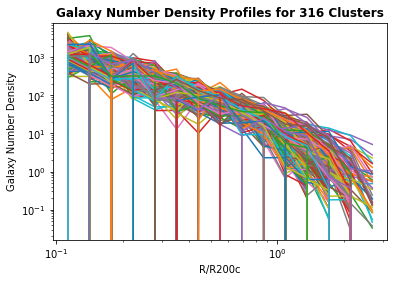

R_avg: 0.6982244391252947


Text(0, 0.5, 'dlog of Number Density')

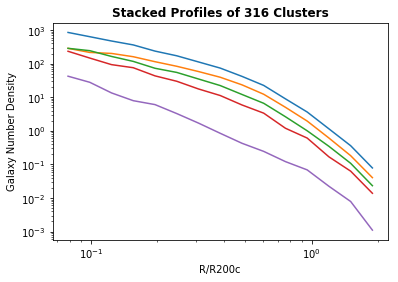

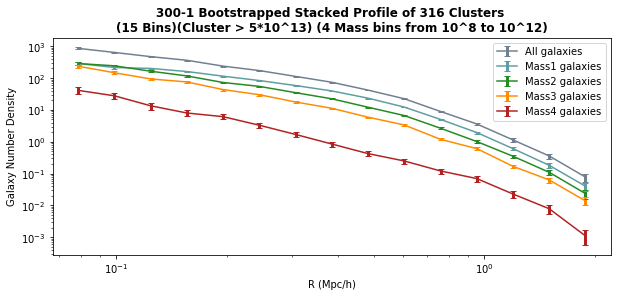

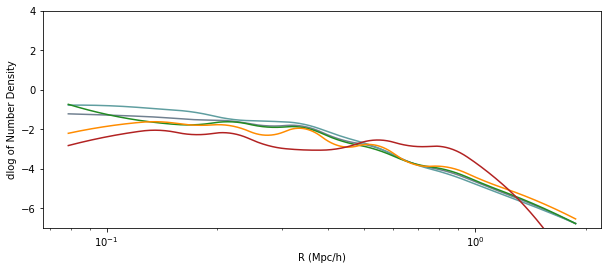

In [41]:
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))&(halo_grp['GroupNsubs']>=5)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

bins = 15#30#15
Rmin = .1#.1
Rmax = 3#5.5 # for R200c#7

NDensity_list = []
NDensity_list_1 = []
NDensity_list_2 = []
NDensity_list_3 = []
NDensity_list_4 = []

ND_boot = []
ND_boot_1 = []
ND_boot_2 = []
ND_boot_3 = []
ND_boot_4 = []

RScale_list = []
Rmax_list = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]

mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after first masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    mask_total = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)#&(subhalomass > (10**9))
    mask_total2 = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass >= (10**8))
    print("N Subhalos after total masking (> 10^8):", len(subhalo_grp['SubhaloGrNr'][mask_total2]))

    '''
    # COLOR CUTS
    mag = subhalo_grp['SubhaloStellarPhotometrics'][mask_total]
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalomass[mask_total])
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    '''
    #MASS BIN CUTS:
    #subhalomass_masked = subhalomass[mask_total]
    massmask1 = (subhalomass[mask_total2]>=(10**8))&(subhalomass[mask_total2]<(10**9))
    massmask2 = (subhalomass[mask_total2]>=(10**9))&(subhalomass[mask_total2]<(10**10))
    massmask3 = (subhalomass[mask_total2]>=(10**10))&(subhalomass[mask_total2]<(10**11))
    massmask4 = (subhalomass[mask_total2]>=(10**11))&(subhalomass[mask_total2]<(10**12))

    #print(len(subhalomass[mask_total][massmask1]))
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask_total2]
    CM_halo = halo_grp['GroupCM'][h_i]
    
    #print("len of all, blue, red:", len(CM_coords), len(CM_coords[blue_mask_subs]), len(CM_coords[red_mask_subs]), len(CM_coords[green_mask_subs]))

    # MAKING PROFILE
    #r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    redshift = header['Redshift']
    #H = cosmo.H(redshift)
    #conv_fac = 100/(H.value*1000)
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = CM_coords-CM_halo
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]/.704
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    Rmax_list.append(max(r_subhalo/RScale))

    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_1 = []
    NDensity_2 = []
    NDensity_3 = []
    NDensity_4 = []

    galaxies = []
    galaxies_1 = []
    galaxies_2 = []
    galaxies_3 = []
    galaxies_4 = []
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_1 = len(r_subhalo[mask_sep & massmask1])
        number_2 = len(r_subhalo[mask_sep & massmask2])
        number_3 = len(r_subhalo[mask_sep & massmask3])
        number_4 = len(r_subhalo[mask_sep & massmask4])


        NDensity_1.append(number_1/volume)
        NDensity_2.append(number_2/volume)
        NDensity_3.append(number_3/volume)        
        NDensity_4.append(number_4/volume)        

        galaxies_1.append(number_1)
        galaxies_2.append(number_2)
        galaxies_3.append(number_3)
        galaxies_4.append(number_4)

    print("galaxies", galaxies)
    print("mass1 galaxies counted", galaxies_1)
    print("mass2 galaxies counted", galaxies_2)
    print("mass3 galaxies counted", galaxies_3)
    print("mass4 galaxies counted", galaxies_4)

        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_1.append(NDensity_1)
    NDensity_list_2.append(NDensity_2)
    NDensity_list_3.append(NDensity_3)
    NDensity_list_4.append(NDensity_4)

    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')
plt.show()

# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack = R_avg*(bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_1 = np.mean(NDensity_list_1, axis=0)
NDensity_stack_2 = np.mean(NDensity_list_2, axis=0)
NDensity_stack_3 = np.mean(NDensity_list_3, axis=0)
NDensity_stack_4 = np.mean(NDensity_list_4, axis=0)

plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.plot(bin_stack, NDensity_stack_1, '-')
plt.plot(bin_stack, NDensity_stack_2, '-')
plt.plot(bin_stack, NDensity_stack_3, '-')
plt.plot(bin_stack, NDensity_stack_4, '-')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_1, cov_1, boot_err_1 = Bootstrap_Covariance(NDensity_list_1, 300, bins)
Yi_avg_2, cov_2, boot_err_2 = Bootstrap_Covariance(NDensity_list_2, 300, bins)
Yi_avg_3, cov_3, boot_err_3 = Bootstrap_Covariance(NDensity_list_3, 300, bins)
Yi_avg_4, cov_4, boot_err_4 = Bootstrap_Covariance(NDensity_list_4, 300, bins)

dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_1, dlog_data_SG_y_1, yy_fine_1, xx_fine_1 = get_slope_sg(bin_stack, (Yi_avg_1), 1000)  
dlog_data_SG_x_2, dlog_data_SG_y_2, yy_fine_2, xx_fine_2 = get_slope_sg(bin_stack, (Yi_avg_2), 1000)  
dlog_data_SG_x_3, dlog_data_SG_y_3, yy_fine_3, xx_fine_3 = get_slope_sg(bin_stack, (Yi_avg_3), 1000)  
dlog_data_SG_x_4, dlog_data_SG_y_4, yy_fine_4, xx_fine_4 = get_slope_sg(bin_stack, (Yi_avg_4), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'slategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_1, yerr = boot_err_1, c = 'cadetblue',ecolor = 'cadetblue', elinewidth = 3, capsize=3, label = 'Mass1 galaxies')
plt.errorbar(bin_stack, Yi_avg_2, yerr = boot_err_2, c='forestgreen', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Mass2 galaxies')
plt.errorbar(bin_stack, Yi_avg_3, yerr = boot_err_3, c='darkorange', ecolor = 'darkorange', elinewidth = 3, capsize=3, label = 'Mass3 galaxies')
plt.errorbar(bin_stack, Yi_avg_4, yerr = boot_err_4, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Mass4 galaxies')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) (4 Mass bins from 10^8 to 10^12)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_1, dlog_data_SG_y_1, c = 'cadetblue')
plt.plot(dlog_data_SG_x_2, dlog_data_SG_y_2, c = 'forestgreen')
plt.plot(dlog_data_SG_x_3, dlog_data_SG_y_3, c = 'darkorange')
plt.plot(dlog_data_SG_x_4, dlog_data_SG_y_4, c = 'firebrick')
plt.ylim(-7,4)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')


Text(1.7, 3, 'SG: 5,3')

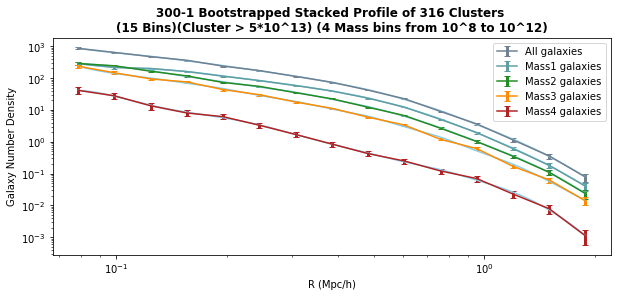

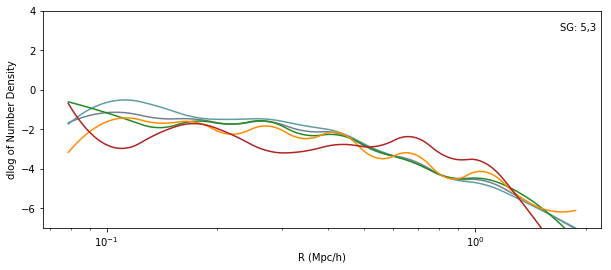

In [53]:
#Continued plotting of mass split profiles
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_1, dlog_data_SG_y_1, yy_fine_1, xx_fine_1 = get_slope_sg(bin_stack, (Yi_avg_1), 1000)  
dlog_data_SG_x_2, dlog_data_SG_y_2, yy_fine_2, xx_fine_2 = get_slope_sg(bin_stack, (Yi_avg_2), 1000)  
dlog_data_SG_x_3, dlog_data_SG_y_3, yy_fine_3, xx_fine_3 = get_slope_sg(bin_stack, (Yi_avg_3), 1000)  
dlog_data_SG_x_4, dlog_data_SG_y_4, yy_fine_4, xx_fine_4 = get_slope_sg(bin_stack, (Yi_avg_4), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'slategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_1, yerr = boot_err_1, c = 'cadetblue',ecolor = 'cadetblue', elinewidth = 3, capsize=3, label = 'Mass1 galaxies')
plt.errorbar(bin_stack, Yi_avg_2, yerr = boot_err_2, c='forestgreen', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Mass2 galaxies')
plt.errorbar(bin_stack, Yi_avg_3, yerr = boot_err_3, c='darkorange', ecolor = 'darkorange', elinewidth = 3, capsize=3, label = 'Mass3 galaxies')
plt.errorbar(bin_stack, Yi_avg_4, yerr = boot_err_4, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Mass4 galaxies')
plt.plot(xx_fine, yy_fine, c = 'skyblue')
plt.plot(xx_fine_1, yy_fine_1, c = 'skyblue')
plt.plot(xx_fine_2, yy_fine_2, c = 'skyblue')
plt.plot(xx_fine_3, yy_fine_3, c = 'skyblue')
plt.plot(xx_fine_4, yy_fine_4, c = 'skyblue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) (4 Mass bins from 10^8 to 10^12)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_1, dlog_data_SG_y_1, c = 'cadetblue')
plt.plot(dlog_data_SG_x_2, dlog_data_SG_y_2, c = 'forestgreen')
plt.plot(dlog_data_SG_x_3, dlog_data_SG_y_3, c = 'darkorange')
plt.plot(dlog_data_SG_x_4, dlog_data_SG_y_4, c = 'firebrick')
plt.ylim(-7,4)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))


## Histograms of halos

18767465
[87453.625 57760.027 56635.2   48978.547 40328.406 36715.758 31760.066
 31613.166 31110.195 30706.139 30121.426 29552.848 29994.932 27343.611
 25908.443 25923.64  24286.85  24397.488 22562.018 21426.482]
2686
[87453.625 57760.027 56635.2   48978.547 40328.406 36715.758 31760.066
 31613.166 31110.195 30706.139 30121.426 29552.848 29994.932 27343.611
 25908.443 25923.64  24286.85  24397.488 22562.018 21426.482]


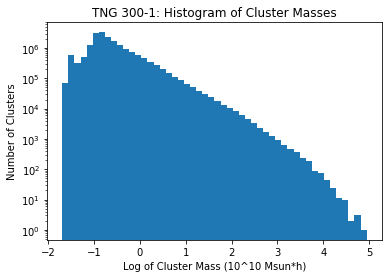

Count of subhalos: 15904796
Number of Total groups in Snapshot: 18767465
Number of Total subgroups in Snapshot: 15904796


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Halos with subhalos: 12952011
Halos with more than 5 subhalos: 88076


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[

Subhalos not flagged and with DM mass > 10^11: 15594
Number of halos with mass > 10^13 Msun: 100


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Number of halos with mass > 10^13 Msun: 100


Text(0, 0.5, 'Number of Clusters (Log Scaled)')

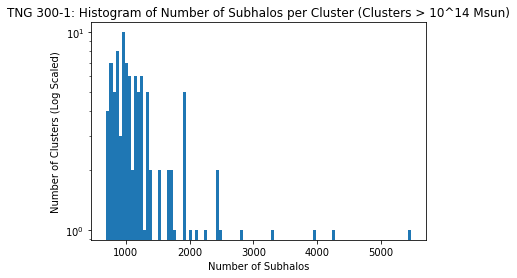

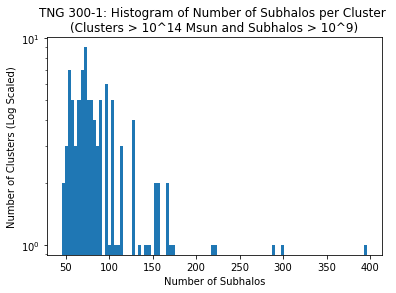

In [6]:
#HISTOGRAMS
print(halo_grp['count'])
Cluster_masses = halo_grp['GroupMass']

print(Cluster_masses[:20])
cluster_mass_mask = (Cluster_masses >= (10**3))
print(len((Cluster_masses)[cluster_mass_mask]))
print(((Cluster_masses)[cluster_mass_mask])[:20])
plt.hist((np.log10(Cluster_masses)), bins=50)#bins=[0,100])
plt.title('TNG 300-1: Histogram of Cluster Masses')
plt.xlabel('Log of Cluster Mass (10^10 Msun*h)')
plt.ylabel('Number of Clusters')
plt.yscale('log')
plt.show()

print("Count of subhalos:",subhalo_grp['count'])
print("Number of Total groups in Snapshot:", header['Ngroups_Total'])
print("Number of Total subgroups in Snapshot:", header['Nsubgroups_Total'])
grp_first_sub = halo_grp['GroupFirstSub']
mask = [grp_first_sub != -1]
print("Halos with subhalos:",len(grp_first_sub[mask]))
print("Halos with more than 5 subhalos:", len(halo_grp['GroupNsubs'][halo_grp['GroupNsubs']>5]))
mask_flag = [subhalo_grp['SubhaloFlag'] == True]
subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
mask_mass = [subhalomass>11]
print("Subhalos not flagged and with DM mass > 10^11:", len((subhalo_grp['SubhaloFlag'])[mask_flag and mask_mass]))
mask_halomass = [(halo_grp['GroupMass'])>=(10**4)]
print("Number of halos with mass > 10^13 Msun:", len(halo_grp['GroupMass'][mask_halomass]))

#Histogram of number of subhalos
plt.figure()
x = (halo_grp['GroupNsubs'])[mask_halomass]#[halo_grp['GroupNsubs']>0]
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist((x), bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300-1: Histogram of Number of Subhalos per Cluster (Clusters > 10^14 Msun)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')

# SUBHALO MASS CUTS AND HISTOGRAM OF SUBHALSO PER CLUSTER
#mask_halomass = ((halo_grp['GroupMass'])>=((10**3)))#&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^13 Msun:", Number_of_halos)
halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]
halo_subhalos = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]
mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    #print("\nHalo:", h_i)
    #print("Halo # of Subhalos:", halo_grp['GroupNsubs'][h_i])
    #print("Halo Mass:", halo_grp['GroupMass'][h_i])
    #print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
    iFS = halo_grp['GroupFirstSub'][h_i]
    #print(subhalo_grp['SubhaloGrNr'][iFS]) #635-783 is halo  in subhalo catalog
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    #print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)/0.704))
    mask = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > (10**9))    #mask = [subhalo_grp['SubhaloFlag']==True]
    subhalos = len(subhalo_grp['SubhaloGrNr'][mask])
    halo_subhalos.append(subhalos)
halo_subhalos = np.array(halo_subhalos)

plt.figure()
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist(halo_subhalos, bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300-1: Histogram of Number of Subhalos per Cluster \n(Clusters > 10^14 Msun and Subhalos > 10^9)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')
